# Import Packages

In [1]:
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [4]:
#loading application data
bank_application=pd.read_csv('application_data.csv')



# Basic Data Exploration

In [5]:
#First inspecting the application data set with variable bank_application

In [6]:
bank_application.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#print shape of application data
bank_application.shape

(307511, 122)

In [8]:
#print size of application data
bank_application.size

37516342

In [9]:
bank_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
# Describe all the bank application dataset
bank_application.describe(include= 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [11]:
bank_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
#Checking datatypes of application dataset
bank_application.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
#checking the column names of application data
print("Column of application_data")
for col in bank_application.columns:
    print(col)

Column of application_data
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_

#  Data Cleaning and Imputation

# Missing Value check


In [14]:
#Missing value check column-wise null count and percentage here for application_data

In [15]:
def missing_check(bank_application):
    total = bank_application.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (bank_application.isnull().sum()/bank_application.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(bank_application)

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [16]:
#Missing value check row-wise null count and percentage here for application_data
bank_application.isnull().sum(axis=1) #row-wise null count here

0          1
1          2
2         48
3         56
4         50
          ..
307506     8
307507    10
307508     4
307509    30
307510    17
Length: 307511, dtype: int64

In [17]:
#Create the column-wise null percentages from application data in variable percent
#percent = pd.DataFrame((bank_application.isnull().sum()/bank_application.isnull().count()).sort_values(ascending=True)) # percentage of values that are null
#print(percent)
#percent.columns = ['Column Name', 'Null Values Per']
null_percent = pd.DataFrame(((bank_application.isnull().sum()/len(bank_application.index))*100)).reset_index() # Create the column-wise null percentages from applicaton_data
null_percent.columns = ['Column Name', 'Null Percentage']

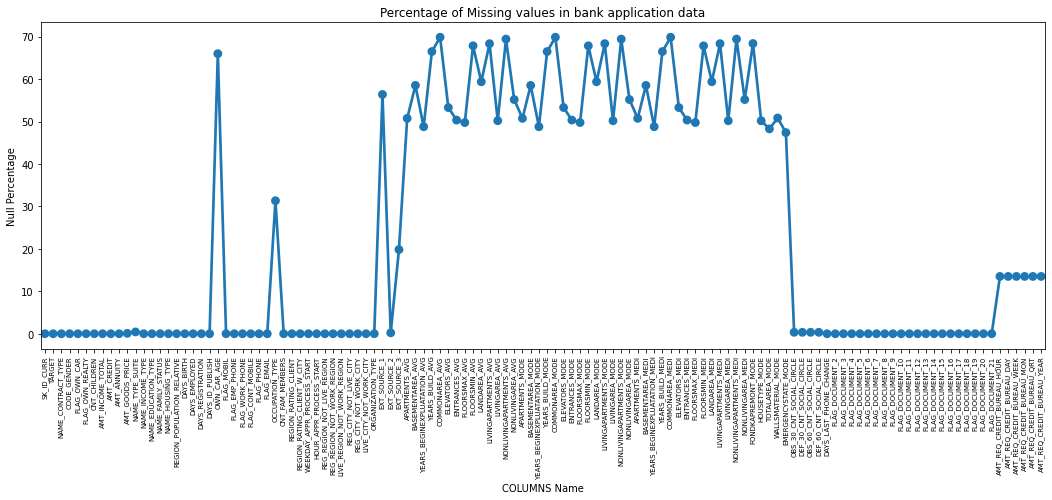

In [18]:
#plotting the null percentage to Remove columns with high missing percentage
fig = plt.figure(figsize=(18,6))
sns.pointplot(x='Column Name',y='Null Percentage',data=null_percent)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in bank application data")
plt.ylabel("Null Percentage")
plt.xlabel("COLUMNS Name")
plt.show()

# Remove columns with high missing percentage

In [19]:
#The above fig shows that maximum null value is above the 40 percentage, so we Remove columns with high missing percentage

In [20]:
#Checking the number of columns with null value percentage  more than or equal to 40%
#empty_cells=bank_application.isnull().sum()
#empty_cells=empty_cells[empty_cells.values>(0.40*len(df))]
#len(empty_cells)

empty_cells = null_percent[null_percent["Null Percentage"]>=40]
empty_cells



,Column Name,Null Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


# Analyze and remove irrelevent columns in bank_application data

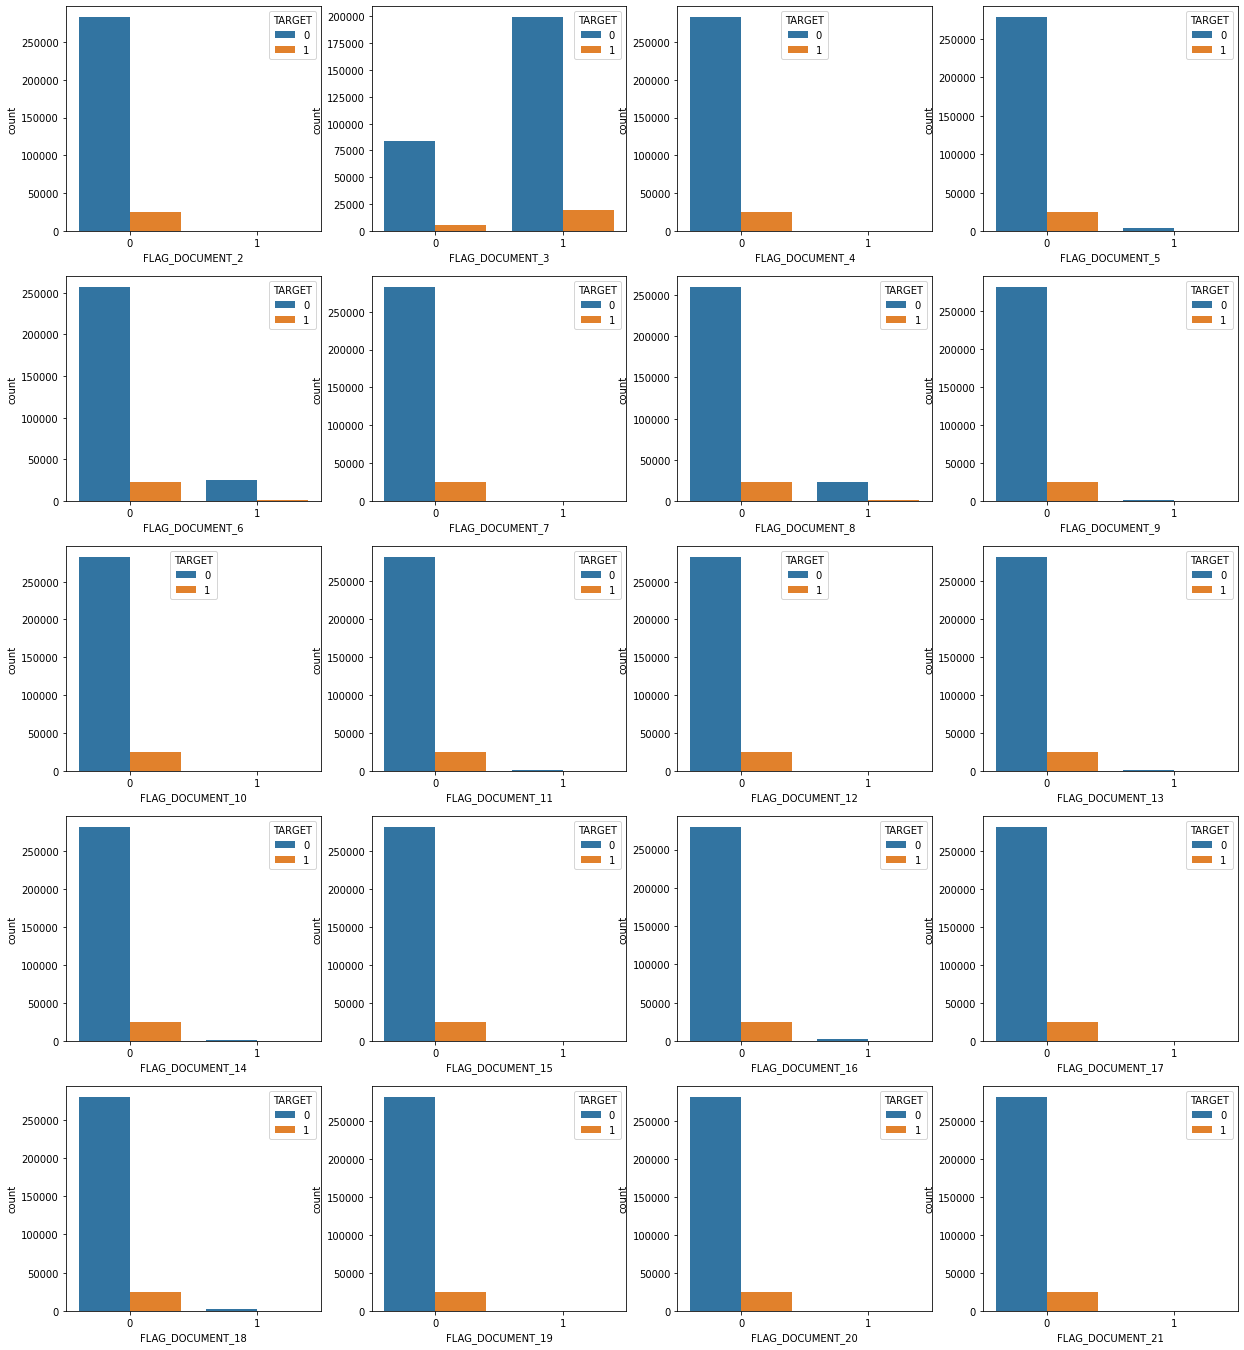

In [21]:
#Check the below columns are important or not by the correlation method
flag_columns= [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
plt.figure(figsize=(21,24))
for n in enumerate(flag_columns):
    plt.subplot(5,4,n[0]+1)
    sns.countplot(n[1],hue='TARGET',data=bank_application)

In [22]:
#Now, we can see that Flag documnet columns are those document whose are not submitted by the client so we make an new column "Total_Flag_col". In this columns we add all the flag_documnet because client are submitted only some document.

bank_application['TO_sub_doc']=(bank_application['FLAG_DOCUMENT_2']+bank_application['FLAG_DOCUMENT_3']+bank_application['FLAG_DOCUMENT_4']+bank_application['FLAG_DOCUMENT_5']+bank_application['FLAG_DOCUMENT_6']+
bank_application['FLAG_DOCUMENT_7']+bank_application['FLAG_DOCUMENT_8']+bank_application['FLAG_DOCUMENT_9']+bank_application['FLAG_DOCUMENT_10']+bank_application['FLAG_DOCUMENT_11']+bank_application['FLAG_DOCUMENT_12']+
bank_application['FLAG_DOCUMENT_13']+bank_application['FLAG_DOCUMENT_14']+bank_application['FLAG_DOCUMENT_15']+bank_application['FLAG_DOCUMENT_16']+bank_application['FLAG_DOCUMENT_17']+
bank_application['FLAG_DOCUMENT_18']+bank_application['FLAG_DOCUMENT_19']+bank_application['FLAG_DOCUMENT_20']+bank_application['FLAG_DOCUMENT_21'])

#After creating a new column by adding all the flag doc columns we can drop all the flag doc columns because none have submitted any document except of flag_document_3.

# Create non-important_col column where all column are not important and lot of null values
non_important_col=empty_cells["Column Name"].tolist()
non_important_col=non_important_col + flag_columns
len(non_important_col)

69

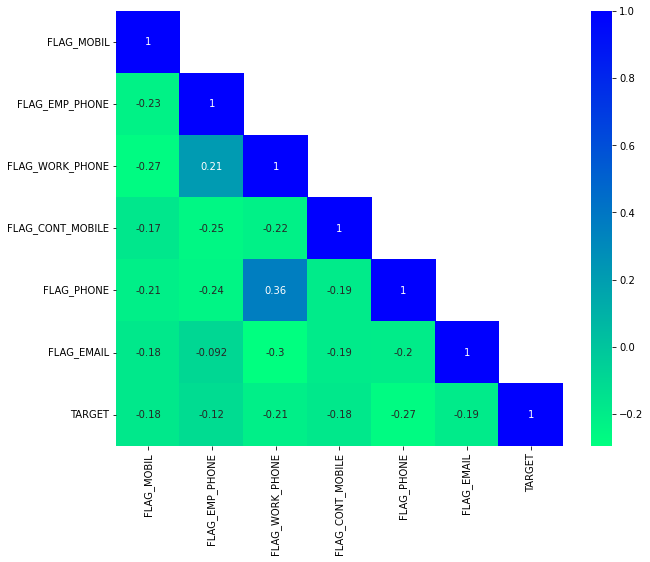

In [23]:
# Now, we check if there is any correlation between all contacts parameters
flag_contact_cols = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
                 'FLAG_EMAIL','TARGET']
contact_corr = bank_application[flag_contact_cols].corr()
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(contact_corr.corr(),mask=np.triu(contact_corr.corr(),+1),annot=True,cmap="winter_r")
plt.show()
#fig = plt.figure(figsize=(8,8))
#sns.heatmap(contact_corr,xticklabels=contact_corr.columns,yticklabels=contact_corr.columns,
            #annot = True, fmt='.2g',cmap= 'coolwarm')

In [24]:
#Since There is no correlation between flags of phone, email etc with target variable(bank_application);  these columns can be removed.
#adding these columns as non-important
flag_contact_cols.remove("TARGET")
non_important_col=non_important_col + flag_contact_cols
len(non_important_col)

75

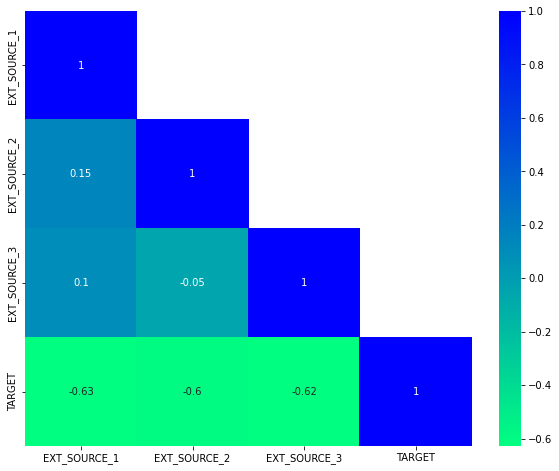

In [25]:
# check correlation between EXT_SOURCE_X columns and TARGET column
ext_source_cols = ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]
ext_source_corr = bank_application[ext_source_cols].corr()
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(ext_source_corr.corr(),mask=np.triu(ext_source_corr.corr(),+1),annot=True,cmap="winter_r")
plt.show()

#sns.heatmap(ext_source_corr,xticklabels=ext_source_corr.columns,yticklabels=ext_source_corr.columns,
            #annot = True, fmt='.2g',cmap= 'coolwarm')

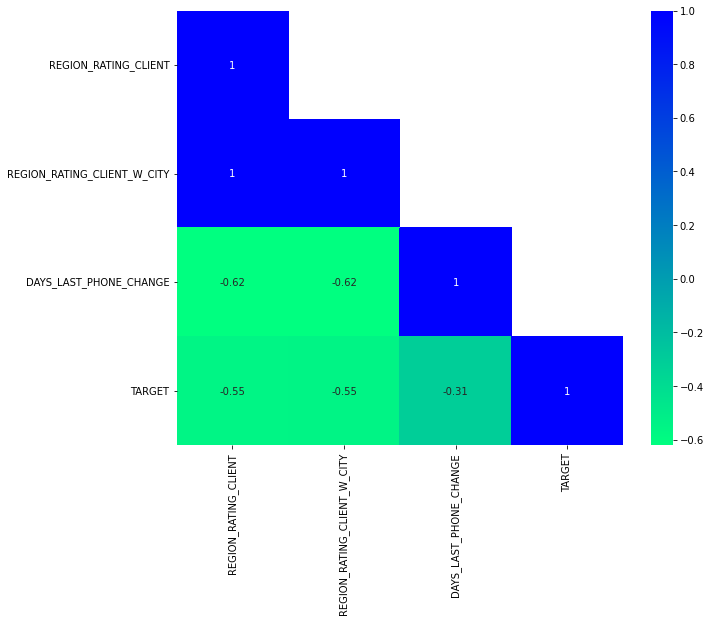

In [26]:
# check correlation between EXT_SOURCE_X columns and TARGET column
unuse_cols = ["REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE","TARGET"]
unuse_cols_corr = bank_application[unuse_cols].corr()
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(unuse_cols_corr.corr(),mask=np.triu(unuse_cols_corr.corr(),+1),annot=True,cmap="winter_r")
plt.show()

#sns.heatmap(ext_source_corr,xticklabels=ext_source_corr.columns,yticklabels=ext_source_corr.columns,
            #annot = True, fmt='.2g',cmap= 'coolwarm')

In [27]:
#there is almost no correlation between EXT_SOURCE_X columns and target column, so we will drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values
#adding these columns as non-important
ext_source_cols.remove("TARGET")
non_important_col=non_important_col + ext_source_cols
len(non_important_col)

78

In [28]:
#there is almost no correlation between unuse_cols columns and target column, so we will drop these columns.
#since column CNT_FAM_MEMBERS","CNT_CHILDREN more correlated like more than same column hence removing the CNT_CHILDREN col
#adding these columns as non-important
unuse_cols.remove("TARGET")
non_important_col=non_important_col + unuse_cols
len(non_important_col)

81

In [29]:
#Dropping nulvalues col having more than 40% and other non-important cols
bank_application.drop(labels=non_important_col,axis=1,inplace=True)

In [30]:
bank_application.shape

(307511, 43)

In [31]:
#missing value check after dropping the col having nul values  more than 40%
def missing_check(bank_application):
    total = bank_application.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (bank_application.isnull().sum()/bank_application.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(bank_application)

,Total,Percent
OCCUPATION_TYPE,96391,0.313455
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
NAME_TYPE_SUITE,1292,0.004201
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320


In [32]:
#checking the column names of application data after dropping
print("Column of application_data")
for col in bank_application.columns:
    print(col)

Column of application_data
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OCCUPATION_TYPE
CNT_FAM_MEMBERS
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
TO_sub_doc


# Imputaion of values for columns where missing values in application data 

In [33]:
#checking median for imputation
bank_application.median()

SK_ID_CURR                     278202.00000
TARGET                              0.00000
CNT_CHILDREN                        0.00000
AMT_INCOME_TOTAL               147150.00000
AMT_CREDIT                     513531.00000
AMT_ANNUITY                     24903.00000
AMT_GOODS_PRICE                450000.00000
REGION_POPULATION_RELATIVE          0.01885
DAYS_BIRTH                     -15750.00000
DAYS_EMPLOYED                   -1213.00000
DAYS_REGISTRATION               -4504.00000
DAYS_ID_PUBLISH                 -3254.00000
CNT_FAM_MEMBERS                     2.00000
HOUR_APPR_PROCESS_START            12.00000
REG_REGION_NOT_LIVE_REGION          0.00000
REG_REGION_NOT_WORK_REGION          0.00000
LIVE_REGION_NOT_WORK_REGION         0.00000
REG_CITY_NOT_LIVE_CITY              0.00000
REG_CITY_NOT_WORK_CITY              0.00000
LIVE_CITY_NOT_WORK_CITY             0.00000
OBS_30_CNT_SOCIAL_CIRCLE            0.00000
DEF_30_CNT_SOCIAL_CIRCLE            0.00000
OBS_60_CNT_SOCIAL_CIRCLE        

In [34]:
#print shape of application data
bank_application.shape

(307511, 43)

In [35]:
#Imputing Missing values in the following columns with median which is 0.
fill_list = ['AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']
for x in fill_list:
    bank_application[x].fillna(bank_application[x].median(),inplace=True)

# variable CNT_FAM_MEMBERS

In [36]:
print('Count of null values in CNT_FAM_MEMBERS is:', bank_application['CNT_FAM_MEMBERS'].isnull().sum())
print('Mean of column Count of Family Members is:', bank_application['CNT_FAM_MEMBERS'].mean())
print('Median of column Count of Family Members is:', bank_application['CNT_FAM_MEMBERS'].median())
print('Mode of column Count of Family Members is:', bank_application['CNT_FAM_MEMBERS'].mode())

Count of null values in CNT_FAM_MEMBERS is: 2
Mean of column Count of Family Members is: 2.152665450442101
Median of column Count of Family Members is: 2.0
Mode of column Count of Family Members is: 0    2.0
dtype: float64


In [37]:
#Here there are two blank values in CNT_FAM_MEMBERS  count of family members cannot have fractions or decimals, so we can fill the two blank values with Median which is 2
bank_application['CNT_FAM_MEMBERS'] = bank_application['CNT_FAM_MEMBERS'].fillna(2)

In [38]:

bank_application.ORGANIZATION_TYPE.mode()[0]

'Business Entity Type 3'

# Variable: AMT_GOODS_PRICE

In [39]:
print('Count of null values in AMT_GOODS_PRICE is:', bank_application['AMT_GOODS_PRICE'].isnull().sum())
print('Mean of column AMT_GOODS_PRICE is:',bank_application['AMT_GOODS_PRICE'].mean())
print('Median of column AMT_GOODS_PRICE is:',bank_application['AMT_GOODS_PRICE'].median())
print('Standard deviation of column AMT_GOODS_PRICE is:', bank_application['AMT_GOODS_PRICE'].std())

Count of null values in AMT_GOODS_PRICE is: 278
Mean of column AMT_GOODS_PRICE is: 538396.2074288895
Median of column AMT_GOODS_PRICE is: 450000.0
Standard deviation of column AMT_GOODS_PRICE is: 369446.46054005757


In [40]:
#As standard deviation is quite high, we can use Median value for imputation , Filling missing values with meadian

bank_application['AMT_GOODS_PRICE'].fillna(bank_application['AMT_GOODS_PRICE'].median(),inplace=True)

#categorical feature imputing with mode
bank_application['NAME_TYPE_SUITE'].fillna(bank_application.NAME_TYPE_SUITE.mode()[0], inplace=True)

bank_application.ORGANIZATION_TYPE.mode()[0]




'Business Entity Type 3'

In [41]:
## Occupation_type seems to be important feature for this dataset, so I am replacing the missing values by considering a "Unknown"
# as a new categorical value for this data
# Imputing variable 'OCCUPATION_TYPE', which has high null percentage(31.35%), with a new category as assigning it to any existing category might influence the analysis.
bank_application.loc[pd.isnull(bank_application['OCCUPATION_TYPE']),['OCCUPATION_TYPE']]='Unknown'


# Variable: AMT_ANNUITY

In [42]:
print('Count of null values in AMT_ANNUITY is:', bank_application['AMT_ANNUITY'].isnull().sum())
print('Mean of column AMT_ANNUITY is:', bank_application['AMT_ANNUITY'].mean())
print('Median of column AMT_ANNUITY is:', bank_application['AMT_ANNUITY'].median())
print('Standard deviation of column AMT_ANNUITY is:', bank_application['AMT_ANNUITY'].std())

Count of null values in AMT_ANNUITY is: 12
Mean of column AMT_ANNUITY is: 27108.573909183444
Median of column AMT_ANNUITY is: 24903.0
Standard deviation of column AMT_ANNUITY is: 14493.737315118333


In [43]:
#As standard deviation is quite high, we can use Median value for imputation , Filling missing values with meadian

bank_application['AMT_ANNUITY'].fillna(bank_application['AMT_ANNUITY'].median(),inplace=True)


In [44]:
#Checking missing values after imputation
def missing_check(bank_application):
    total = bank_application.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (bank_application.isnull().sum()/bank_application.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(bank_application)

,Total,Percent
SK_ID_CURR,0,0.0
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
REG_REGION_NOT_LIVE_REGION,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
LIVE_REGION_NOT_WORK_REGION,0,0.0
REG_CITY_NOT_LIVE_CITY,0,0.0
REG_CITY_NOT_WORK_CITY,0,0.0
LIVE_CITY_NOT_WORK_CITY,0,0.0
ORGANIZATION_TYPE,0,0.0


In [45]:
numeric_columns = bank_application.select_dtypes(include = [np.number])
categorical_columns = bank_application.select_dtypes(exclude = [np.number])
print('In the bank_application set, there are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

In the bank_application set, there are 31 numerical and 12 categorical variables in the data set


# Checking data types of all columns in application_data

In [46]:
# checking the data types of all columns
bank_application.dtypes.value_counts()

float64    17
int64      14
object     12
dtype: int64

In [47]:
bank_application.select_dtypes('object').columns 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [48]:
bank_application.select_dtypes('float').columns 

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [49]:
bank_application.select_dtypes('int64').columns 

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TO_sub_doc'],
      dtype='object')

# Standardize Values

In [50]:
#In the application dataset some data are negative value like DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, these are days and we know that days cannot be negative.
#convert negative days to positive days
bank_application['DAYS_BIRTH']=bank_application['DAYS_BIRTH'].apply(lambda x: abs(x))
bank_application['DAYS_EMPLOYED']=bank_application['DAYS_EMPLOYED'].apply(lambda x: abs(x))
bank_application['DAYS_REGISTRATION']=bank_application['DAYS_REGISTRATION'].apply(lambda x: abs(x))
bank_application['DAYS_ID_PUBLISH']=bank_application['DAYS_ID_PUBLISH'].apply(lambda x: abs(x))

In [51]:
#making values readable
#bank_application['AMT_INCOME_TOTAL'] = bank_application['AMT_INCOME_TOTAL']/1000000
#bank_application['AMT_CREDIT'] = bank_application['AMT_CREDIT']/100000

In [52]:
## Binning the birth date 
## Converting days birth into year
bank_application['DAYS_BIRTH'] = bank_application['DAYS_BIRTH']/365
bank_application['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

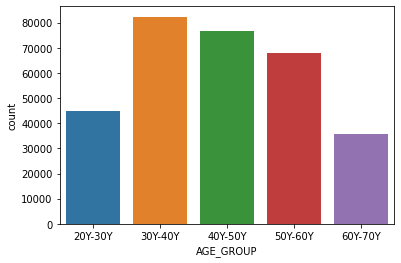

In [53]:
#Binning the birth date 

bank_application['AGE_GROUP'] = pd.cut(bank_application['DAYS_BIRTH'],bins=[20,30,40,50,60,70] , labels = ["20Y-30Y","30Y-40Y","40Y-50Y","50Y-60Y","60Y-70Y"])
#checking the percentage which group is taking loan
sns.countplot(x='AGE_GROUP',data=bank_application)

In [54]:
#Converting days employed into year
bank_application['DAYS_EMPLOYED'] = bank_application['DAYS_EMPLOYED']/365
bank_application['DAYS_EMPLOYED'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

0-5         54.061911
5-10        25.729074
10-20       15.229143
20-30        3.788050
30-40        1.099014
40-50        0.092807
50-60        0.000000
Above 60     0.000000
Name: EMPLOYMENT_GROUP, dtype: float64


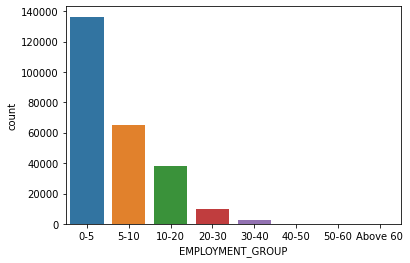

In [55]:
#Binning the DAYS_EMPLOYED 
 
#bank_application['EMPLOYMENT_GROUP'] = pd.cut(bank_application['DAYS_EMPLOYED'],bins=[0, .2, .4, .6,.8, 1.] , labels =["<20Y","20Y-40Y","40Y-60Y","60Y-80Y",">80Y"]
#checking the percentage which group is taking loan
#sns.countplot(x='EMPLOYMENT_GROUP',data=bank_application)

                                              # We creat Employment-Age-Group by the DAYS_EMPLOYED column

bins=[0,5,10,20,30,40,50,60,100]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','Above 60']

bank_application['EMPLOYMENT_GROUP']=pd.cut(bank_application['DAYS_EMPLOYED'],bins=bins,labels=slots)

#checking the percentage which group is maximum experiance loan
print(bank_application['EMPLOYMENT_GROUP'].value_counts(normalize=True)*100)
sns.countplot(x='EMPLOYMENT_GROUP',data=bank_application)



                                              
                                              

In [56]:
bank_application['AMT_INCOME_TOTAL']=bank_application.AMT_INCOME_TOTAL/100000

#Lets create the parameters required for binning.
bins=[0,1,2,3,4,5,6,7,8,9,10,50]
slots=['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', 'Above 1M']
bank_application['AMT_INCOME_TOTAL_RANGE']=pd.cut(bank_application['AMT_INCOME_TOTAL'],bins=bins,labels=slots)

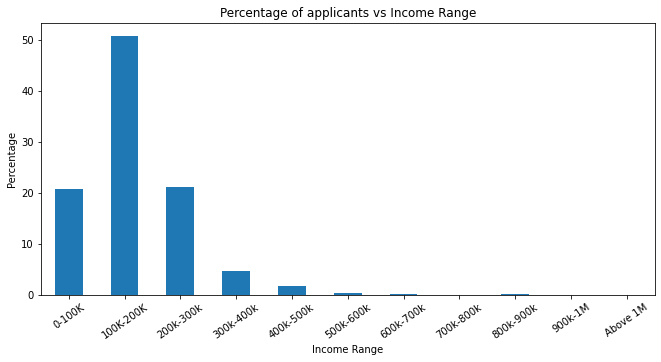

In [57]:
plt.figure(figsize=(11,5))
(bank_application['AMT_INCOME_TOTAL_RANGE'].value_counts(normalize=True)*100).sort_index().plot.bar()
plt.title('Percentage of applicants vs Income Range')
plt.xlabel('Income Range')
plt.ylabel('Percentage')
plt.xticks(rotation=35)
plt.show()

#50% applicants have income in the range of 100k to 200k
#Almost 91% applicants have income in the range of 0 to 300K
#Less than 10& applicants have income more than 300K

In [58]:
bank_application['AMT_CREDIT']=bank_application.AMT_CREDIT/100000

#Lets create the parameters required for binning.
bins=[0,1,2,3,4,5,6,7,8,9,10,50]
slots=['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', 'Above 1M']
bank_application['AMT_CREDIT_RANGE']=pd.cut(bank_application['AMT_CREDIT'],bins=bins,labels=slots)

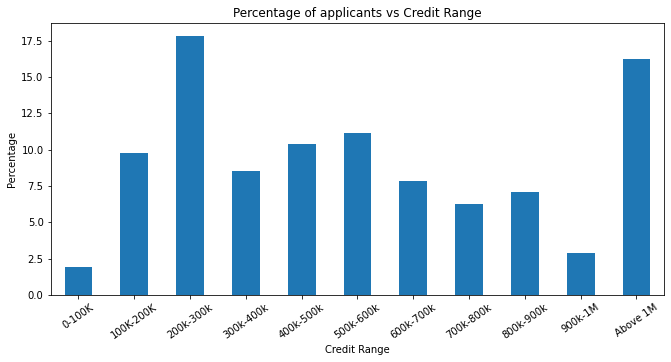

In [59]:
#Checking percentage of each category of AMT_CREDIT

plt.figure(figsize=(11,5))
(bank_application['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100).sort_index().plot.bar()
plt.title('Percentage of applicants vs Credit Range')
plt.xlabel('Credit Range')
plt.ylabel('Percentage')
plt.xticks(rotation=35)
plt.show()

In [60]:
#checking no'Of unique values
bank_application.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_ID_PUBLISH                  6168
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
TO_sub_doc                          5
dtype: int64

In [61]:
#converting the feature values with two unique values into categorical feature
bank_application['REG_REGION_NOT_LIVE_REGION'].replace((0, 1), ('N', 'Y'), inplace=True)
bank_application['REG_REGION_NOT_WORK_REGION'].replace((0, 1), ('N', 'Y'), inplace=True)
bank_application['LIVE_REGION_NOT_WORK_REGION'].replace((0, 1), ('N', 'Y'), inplace=True)
bank_application['REG_REGION_NOT_LIVE_REGION'].replace((0, 1), ('N', 'Y'), inplace=True)
bank_application['REG_CITY_NOT_LIVE_CITY'].replace((0, 1), ('N', 'Y'), inplace=True)
bank_application['REG_CITY_NOT_WORK_CITY'].replace((0, 1), ('N', 'Y'), inplace=True)
bank_application['LIVE_CITY_NOT_WORK_CITY'].replace((0, 1), ('N', 'Y'), inplace=True)

In [62]:
#Checking for duplicate rows
dups = bank_application.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [63]:
#Checking for undefined values in object data type columns

In [64]:
bank_application.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [65]:
#Changing the name of the value to 'Secondary' from 'Secondary / secondary special'

bank_application['NAME_EDUCATION_TYPE'] = bank_application['NAME_EDUCATION_TYPE'].apply(lambda x: 'Secondary' if x=='Secondary / secondary special' else x)


In [66]:
bank_application.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [67]:
#Changing the name of the value to 'Single' from 'Single / not married'

bank_application['NAME_FAMILY_STATUS'] = bank_application['NAME_FAMILY_STATUS'].apply(lambda x: 'Single' if x=='Single / not married' else x)

In [68]:
bank_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [69]:
bank_application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [70]:
#Imputing undefined values with the max
bank_application['CODE_GENDER'].replace(('XNA'), ('F'), inplace=True)
bank_application.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [71]:
bank_application.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [72]:
bank_application.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [73]:
bank_application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [74]:
bank_application.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [75]:
#bank_application=bank_application[~(bank_application.ORGANIZATION_TYPE=='XNA')]
bank_application['ORGANIZATION_TYPE'].replace(('XNA'), ('Business Entity Type 3'), inplace=True)

In [76]:
bank_application.shape
bank_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU

# Analysis of Outliers in bank_application data set

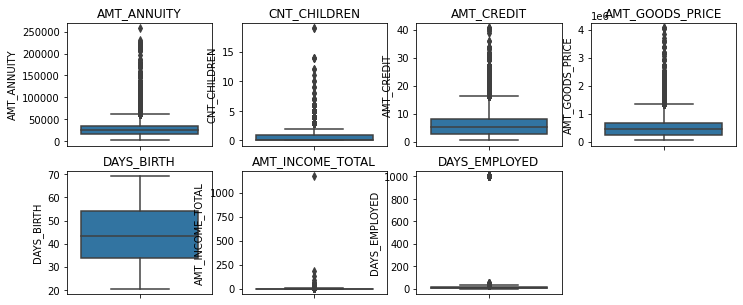

In [77]:
#analysis of outlier

plt.figure(figsize=(12,5))

outlier = ['AMT_ANNUITY', 'CNT_CHILDREN','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','AMT_INCOME_TOTAL','DAYS_EMPLOYED']
for i in enumerate(outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=bank_application[i[1]])
    plt.title(i[1])








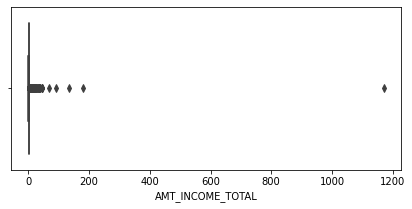

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
90%           2.700000
95%           3.375000
99%           4.725000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64


In [78]:
#It has been observed that variable: AMT_INCOME_TOTAL has several Outliers.
#We will use percentile values to identify the outliers and then will drop them

plt.figure(figsize=(7,3))
sns.boxplot(bank_application['AMT_INCOME_TOTAL'])
plt.show()


#There is one value Outlier in the AMT_INCOME_TOTAL - 117000000.0

bank_application['AMT_INCOME_TOTAL'].max()

annual_income = bank_application['AMT_INCOME_TOTAL'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
print(annual_income)

In [79]:
#We can easily see that at 99 percentiles, the value is less than 0.517500, however between 99% to Max, there is high jump with the max value of 117. We will drop the values greater than 0.5 to continue with this EDA.
#bank_application = bank_application[(bank_application['AMT_INCOME_TOTAL'] < 0.5)]
#plt.figure(figsize=(7,3))
#sns.boxplot(bank_application['AMT_INCOME_TOTAL'])
#plt.show()

#will treat the outlier later after EDA analysis 


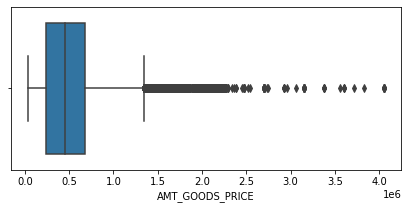

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
90%      1.093500e+06
95%      1.305000e+06
97%      1.354500e+06
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [80]:
#variable AMT_GOODS_PRICE
#It has been observed that variable: AMT_GOODS_PRICE has several Outliers.

plt.figure(figsize=(7,3))
sns.boxplot(bank_application['AMT_GOODS_PRICE'])
plt.show()


#We will use percentile values to identify the outliers and then will drop them


annual_income = bank_application['AMT_GOODS_PRICE'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.97,0.99])
print(annual_income)

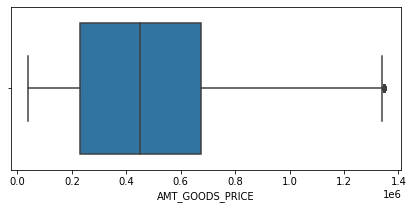

In [81]:
#We can easily see that at 99 percentiles, the value is less than 1.8M, however between 99% to Max, there is high jump with the max value of 4.05M. We will drop the values greater than 1.35M to continue with this EDA.

bank_application = bank_application[(bank_application['AMT_GOODS_PRICE'] < 1350000)]
plt.figure(figsize=(7,3))
sns.boxplot(bank_application['AMT_GOODS_PRICE'])
plt.show()

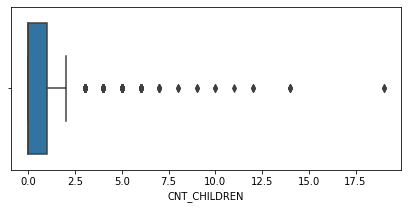

count    293073.000000
mean          0.417824
std           0.722754
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
90%           2.000000
95%           2.000000
99%           3.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


In [82]:
# Variable: CNT_CHILDREN
#It has been observed that variable: CNT_CHILDREN has several Outliers.

plt.figure(figsize=(7,3))
sns.boxplot(bank_application['CNT_CHILDREN'])
plt.show()

#We will use percentile values to identify the outliers and then will drop them


annual_income = bank_application['CNT_CHILDREN'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
print(annual_income)


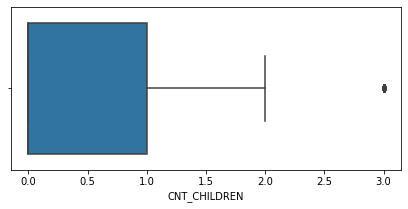

In [83]:
#We can easily see that at 99 percentiles, the value is less than 4, however between 99% to Max, there is high jump with the max value of 19. We will drop the values greater than 6 to continue with this EDA.

#After removing outlier

bank_application = bank_application[(bank_application['CNT_CHILDREN'] <= 3)]
plt.figure(figsize=(7,3))
sns.boxplot(bank_application['CNT_CHILDREN'])
plt.show()

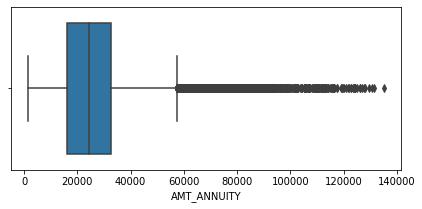

count    292548.000000
mean      25728.792178
std       12834.283346
min        1615.500000
25%       16164.000000
50%       24192.000000
75%       32602.500000
90%       42547.500000
95%       49132.350000
99%       63549.000000
max      134968.500000
Name: AMT_ANNUITY, dtype: float64


In [84]:
#Variable: AMT_ANNUITY
#It has been observed that variable: AMT_ANNUITY has several Outliers.

plt.figure(figsize=(7,3))
sns.boxplot(bank_application['AMT_ANNUITY'])
plt.show()

#We will use percentile values to identify the outliers and then will drop them


annual_income = bank_application['AMT_ANNUITY'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
print(annual_income)

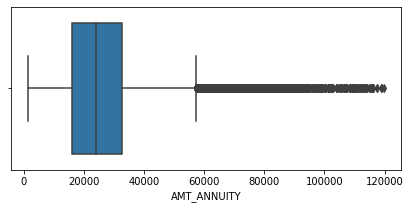

In [85]:
#We can easily see that at 99 percentiles, the value is less than 70K, however between 99% to Max, there is high jump with the max value of 225K. We will drop the values greater than 120K to continue with this EDA.
bank_application = bank_application[(bank_application['AMT_ANNUITY'] < 120000)]
#After removing outlier
plt.figure(figsize=(7,3))
sns.boxplot(bank_application['AMT_ANNUITY'])
plt.show()

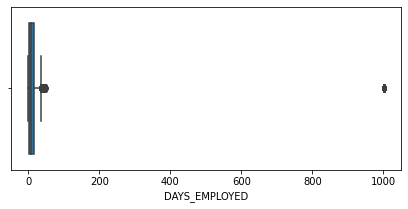

count    292526.000000
mean        187.258854
std         383.524845
min           0.000000
25%           2.534247
50%           6.019178
75%          15.646575
90%        1000.665753
95%        1000.665753
99%        1000.665753
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64


In [86]:
#Variable: DAYS_EMPLOYED
#It has been observed that variable: DAYS_EMPLOYED has several Outliers.

plt.figure(figsize=(7,3))
sns.boxplot(bank_application['DAYS_EMPLOYED'])
plt.show()

#We will use percentile values to identify the outliers and then will drop them


annual_income = bank_application['DAYS_EMPLOYED'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
print(annual_income)

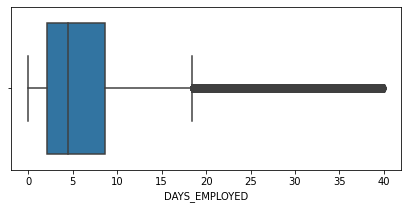

In [87]:
#We can easily see that minimum value of -1000 is our outlier as working experience can not be negative. So, we will drop the negative values to continue with this EDA.
bank_application = bank_application[(bank_application['DAYS_EMPLOYED'] >= 0)]
#dropping rows with more than 40 years of emplyed duration
bank_application=bank_application[~(bank_application.DAYS_EMPLOYED>=40)]
#After removing outlier
plt.figure(figsize=(7,3))
sns.boxplot(bank_application['DAYS_EMPLOYED'])
plt.show()

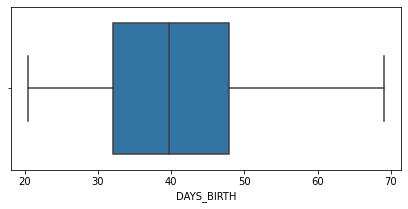

count    239115.000000
mean         40.312841
std          10.029648
min          20.517808
25%          32.073973
50%          39.764384
75%          47.978082
90%          54.082192
95%          57.068493
99%          62.717808
max          69.019178
Name: DAYS_BIRTH, dtype: float64


In [88]:
#Variable: DAYS_BIRTH
#It has been observed that variable: DAYS_BIRTH has several Outliers.

plt.figure(figsize=(7,3))
sns.boxplot(bank_application['DAYS_BIRTH'])
plt.show()

#We will use percentile values to identify the outliers and then will drop them


annual_income = bank_application['DAYS_BIRTH'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
print(annual_income)

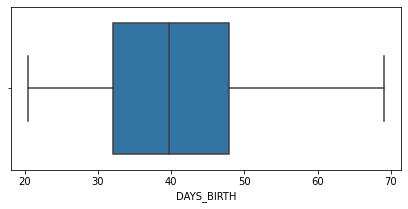

In [89]:
#DAYS_BIRTH has no outlier, which means that the data available is reliable.
#Dropping row with DAYS_BIRTH=0
bank_application=bank_application[~(bank_application.DAYS_BIRTH==0)]
#After removing outlier
plt.figure(figsize=(7,3))
sns.boxplot(bank_application['DAYS_BIRTH'])
plt.show()

# Checking class Imbalance

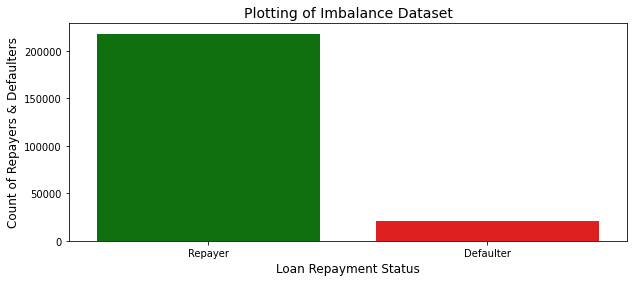

In [90]:
class_Imbalance=bank_application["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
plot= ['Repayer','Defaulter']
sns.barplot(plot,"TARGET",data = class_Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status",fontsize=12)
plt.ylabel("Count of Repayers & Defaulters",fontsize=12)
plt.title("Plotting of Imbalance Dataset",fontsize=14)
plt.show()

In [91]:
#Identifying the imbalance percentage in TARGET

bank_application['TARGET'].value_counts(normalize=True)*100

#from Abovve plot  we know that the imbalance percentage of Repayer[0] and Defaulter[1] is 92% and 8% respectively.

0    91.106371
1     8.893629
Name: TARGET, dtype: float64

# UNIVARIATE ANALYSIS on bank_application data

In [92]:
print("Column of bank_application")
for col in bank_application.columns:
    print(col)

Column of bank_application
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OCCUPATION_TYPE
CNT_FAM_MEMBERS
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
TO_sub_doc
AGE_GROUP
EMPLOYMENT_GROUP
AMT_INCOME_TOTAL_RANGE
AMT_CREDIT_RANGE


In [93]:
#splitting the bank application data on the basis of Target column o and 1

Target_0=bank_application[bank_application['TARGET']==0]
Target_1=bank_application[bank_application['TARGET']==1]

Target_0['TARGET'].replace({0:'Repayer',1:'Defaulter'},inplace=True)
Target_1['TARGET'].replace({0:'Repayer',1:'Defaulter'},inplace=True)
client_status=['Repayer','Defaulter']

In [94]:
# fucntion to plot all col in the univariate analysis
def univariate_analysis(variable,label_rotate=False, Layout_on_next_axis=True): # label_rotation= to rotate the x-axis lables if overlapped.
                                                                    # Layout_on_next_axis=If the data is too big to plot then its
    #commands for horizontal and vertical layout
                                                                # made true to plot on next axis.
    if  Layout_on_next_axis:
        fig, (axis1, axis2, axis3) = plt.subplots(ncols=3, figsize=(13,6))
    else:
        fig, (axis1, axis2, axis3) = plt.subplots(nrows=3, figsize=(20,18))
    
    #Using groupby function to get the percentage of defaulters the selected categorical variable.
    default_percent = bank_application[[variable, 'TARGET']].groupby(variable).mean().reset_index()
    default_percent["TARGET"] = default_percent["TARGET"]*100
    default_percent.sort_values(by='TARGET', ascending=False, inplace=True) #sorting values by TARGET data.

    #### Plot 1 for target_0 Repayer 
    s = sns.countplot(ax=axis1, x=variable, data=Target_0, hue="TARGET",palette='Set1') #plotting countplot
    axis1.set_title(variable) 
    axis1.legend(['Repayer']) 
    
    if label_rotate:
        s.set_xticklabels(s.get_xticklabels(),rotation=90) #label_rotation parameter

    #### Plot 1 for target_1 Defaulter 
    s = sns.countplot(ax=axis2, x=variable, data=Target_1,hue='TARGET',palette='Blues') #plotting barplot
    axis2.set_title(variable)
    axis2.legend(['Defaulter'])
    
    if label_rotate:
        s.set_xticklabels(s.get_xticklabels(),rotation=90) #label_rotation parameter
    plt.tight_layout()
    
     #### Plot 3 to check the defaulter percentage of the variable
    s = sns.barplot(ax=axis3, x=variable, y='TARGET', data=default_percent,palette=['g','r']) #plotting barplot
    plt.ylabel(' Defaulters percentage %', fontsize=12)
    axis3.set_title(variable + " Defaulter Percentage")
    axis3.legend(['Defaulter'])
    
    if label_rotate:
        s.set_xticklabels(s.get_xticklabels(),rotation=90) #label_rotation parameter


    plt.tight_layout()
    plt.show();    

In [95]:
numeric_columns = bank_application.select_dtypes(include = [np.number])
categorical_columns = bank_application.select_dtypes(exclude = [np.number])
print('In the bank_application set, there are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))


In the bank_application set, there are 25 numerical and 22 categorical variables in the data set


# Univariate analysis on categorical cols



# 1.CODE_GENDER

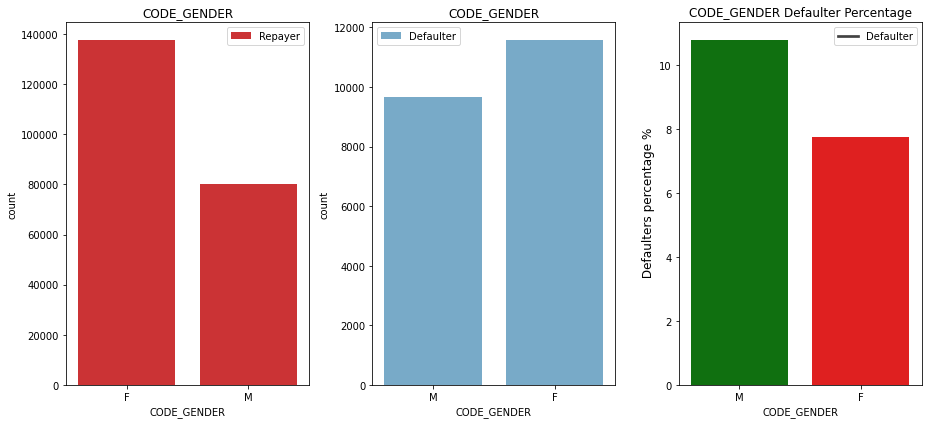

In [96]:
#calling function for analysis
univariate_analysis('CODE_GENDER')

In [97]:
#In the above fig we can see that number of female client is greater than male
#In the Defaulter percentage we can see that male defaulter percentage is higher than female, this means that males have less chance on returning the loans

# 2.NAME_CONTRACT_TYPE

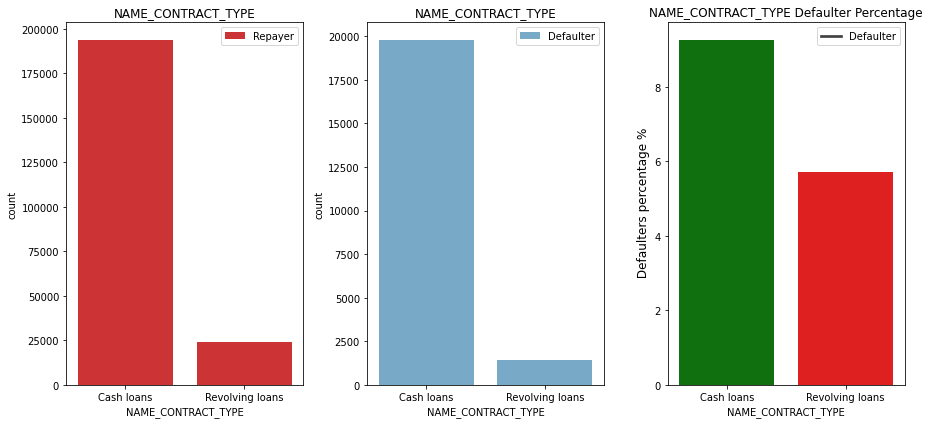

In [98]:
#calling function 
univariate_analysis('NAME_CONTRACT_TYPE')

In [99]:
#we can see that contract type applied less by client is Revolving loans
#still the majority of loan were not repaid 
#we can see that contract type applied more by client is cash loans still the defaulter percentage high on cash loans

# FLAG_OWN_CAR

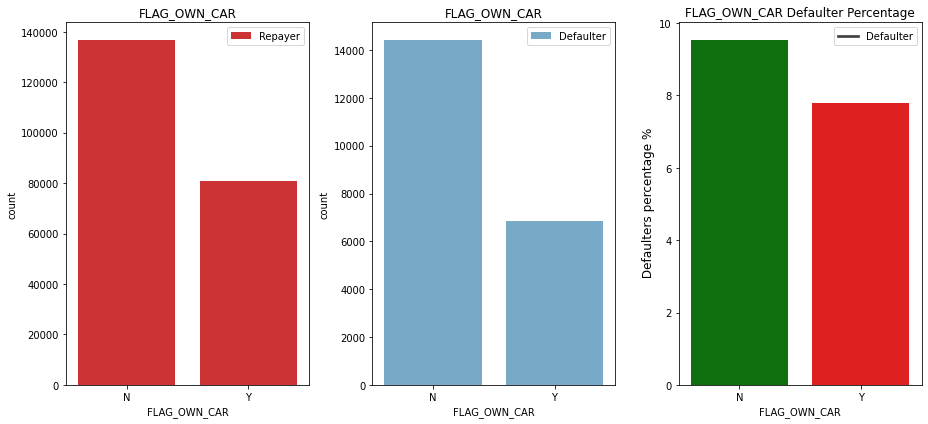

In [100]:
univariate_analysis('FLAG_OWN_CAR')

In [101]:
#we can see that only less number of clients owns a car
#In Defaulter  plot client who does not own car have slightly high chances of not repaying the loan than client who owns the car

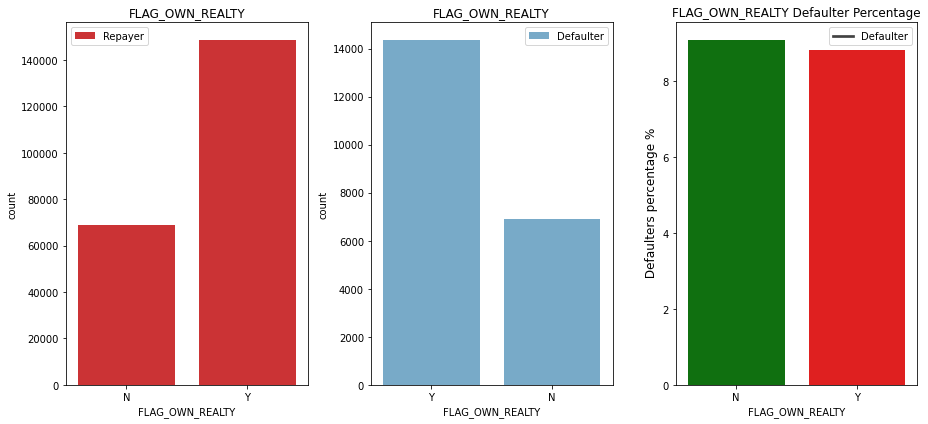

In [102]:
univariate_analysis('FLAG_OWN_REALTY')

In [103]:
#we can see that client who own a reality is high 
#also their percentage of defaulters is almost same

# NAME_FAMILY_STATUS

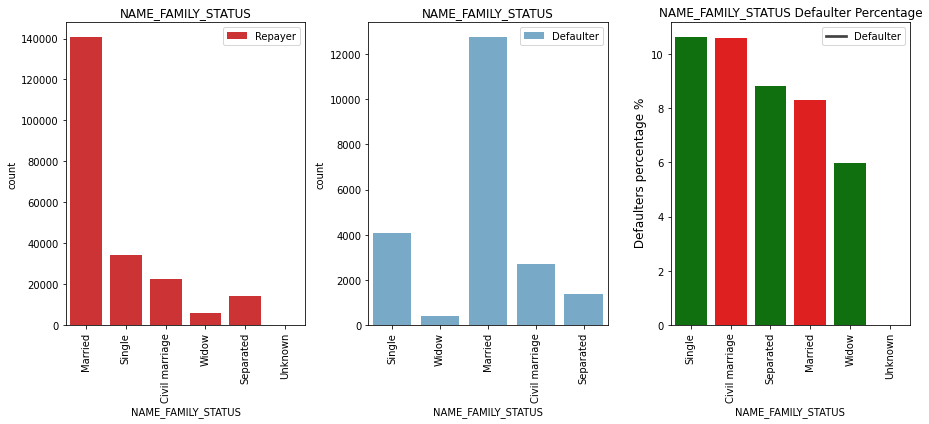

In [104]:
univariate_analysis('NAME_FAMILY_STATUS',True,True)

In [105]:
#high number of loans were taken by clients who are married
#second highest of loans taken by clients who are  Single/not Married clients and then Civil Marriages, Seperated and Widow.
#window has lower percentage of defaulters
#single and civil marriage has higher percentage of defaulters



# NAME_HOUSING_TYPE

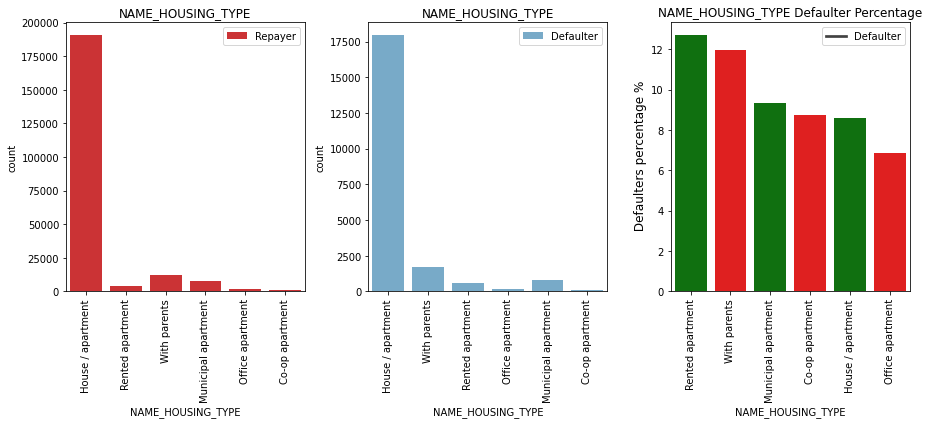

In [106]:
univariate_analysis('NAME_HOUSING_TYPE',True)

In [107]:
#We can see that  majority of the applicants stays in their own House/Apartment.
#Then the second highest  of the applicants who lives with their parents and then comes clients who live in Muncipal apartment.
#Clients live in rental have highest upto 12% defaulters and clients living with parents(approx:11.8) have Highest default rates.

# NAME_INCOME_TYPE

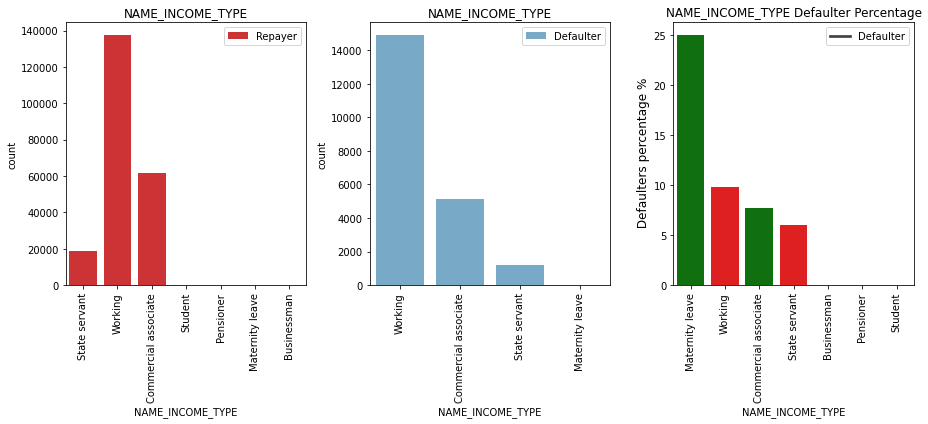

In [108]:
univariate_analysis('NAME_INCOME_TYPE',True)

In [109]:
#majority of clients who are taking loans are working working clients 
#Then the second highest Commercial associate and pensioner.
#applicant with type Maternity leave (40%) are the clients not repaying the loan
#loan can be sanction to students, businessmans and pensioner as they have no percentage of defaulter

# NAME_EDUCATION_TYPE

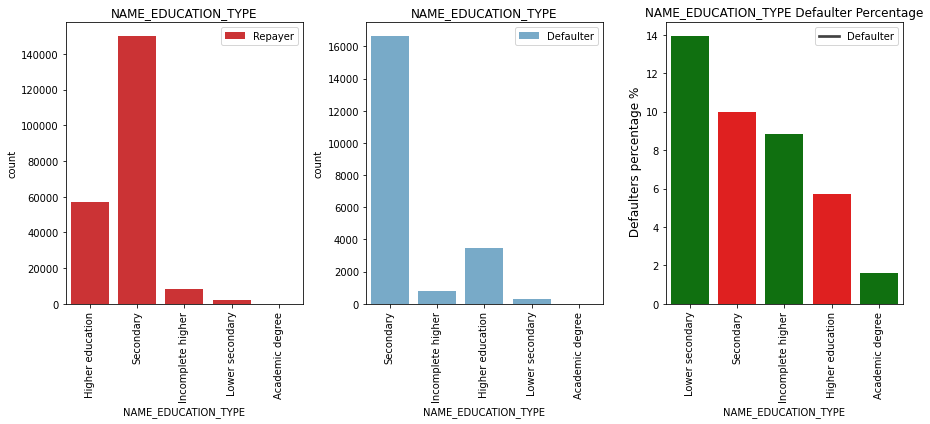

In [110]:
univariate_analysis('NAME_EDUCATION_TYPE',True)

In [111]:
#.Large number of clients who are taking loans have Secondary education followed by  Higher education.
#clients with lower education have higher chances of not repaying the loans as they having highest percent of defaulter percentage
#loan can be sanction to Clients with Academic degree as they have the lowest defaulter %.

# OCCUPATION_TYPE

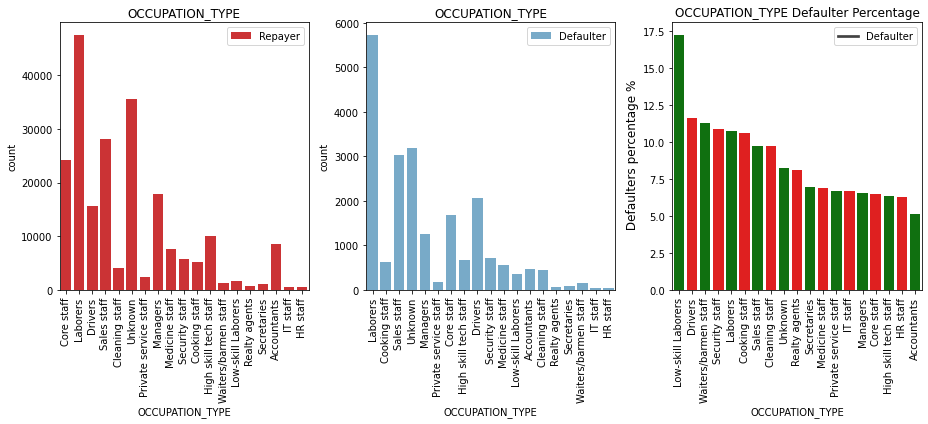

In [112]:
univariate_analysis('OCCUPATION_TYPE',True)

In [113]:
#Large number of loan are taken by  Laborers followed by Sales Staff , Core Staff,Drivers,manager,Accountants.
#although the percentage of loan take by low-skilled laborers are less, but it has the highest percentage of not repaying the loan.followed by Drivers, Waiters/barmen staff, security staff, laborers,cooking staff have hight percentage of defaulters

# ORGANIZATION TYPE

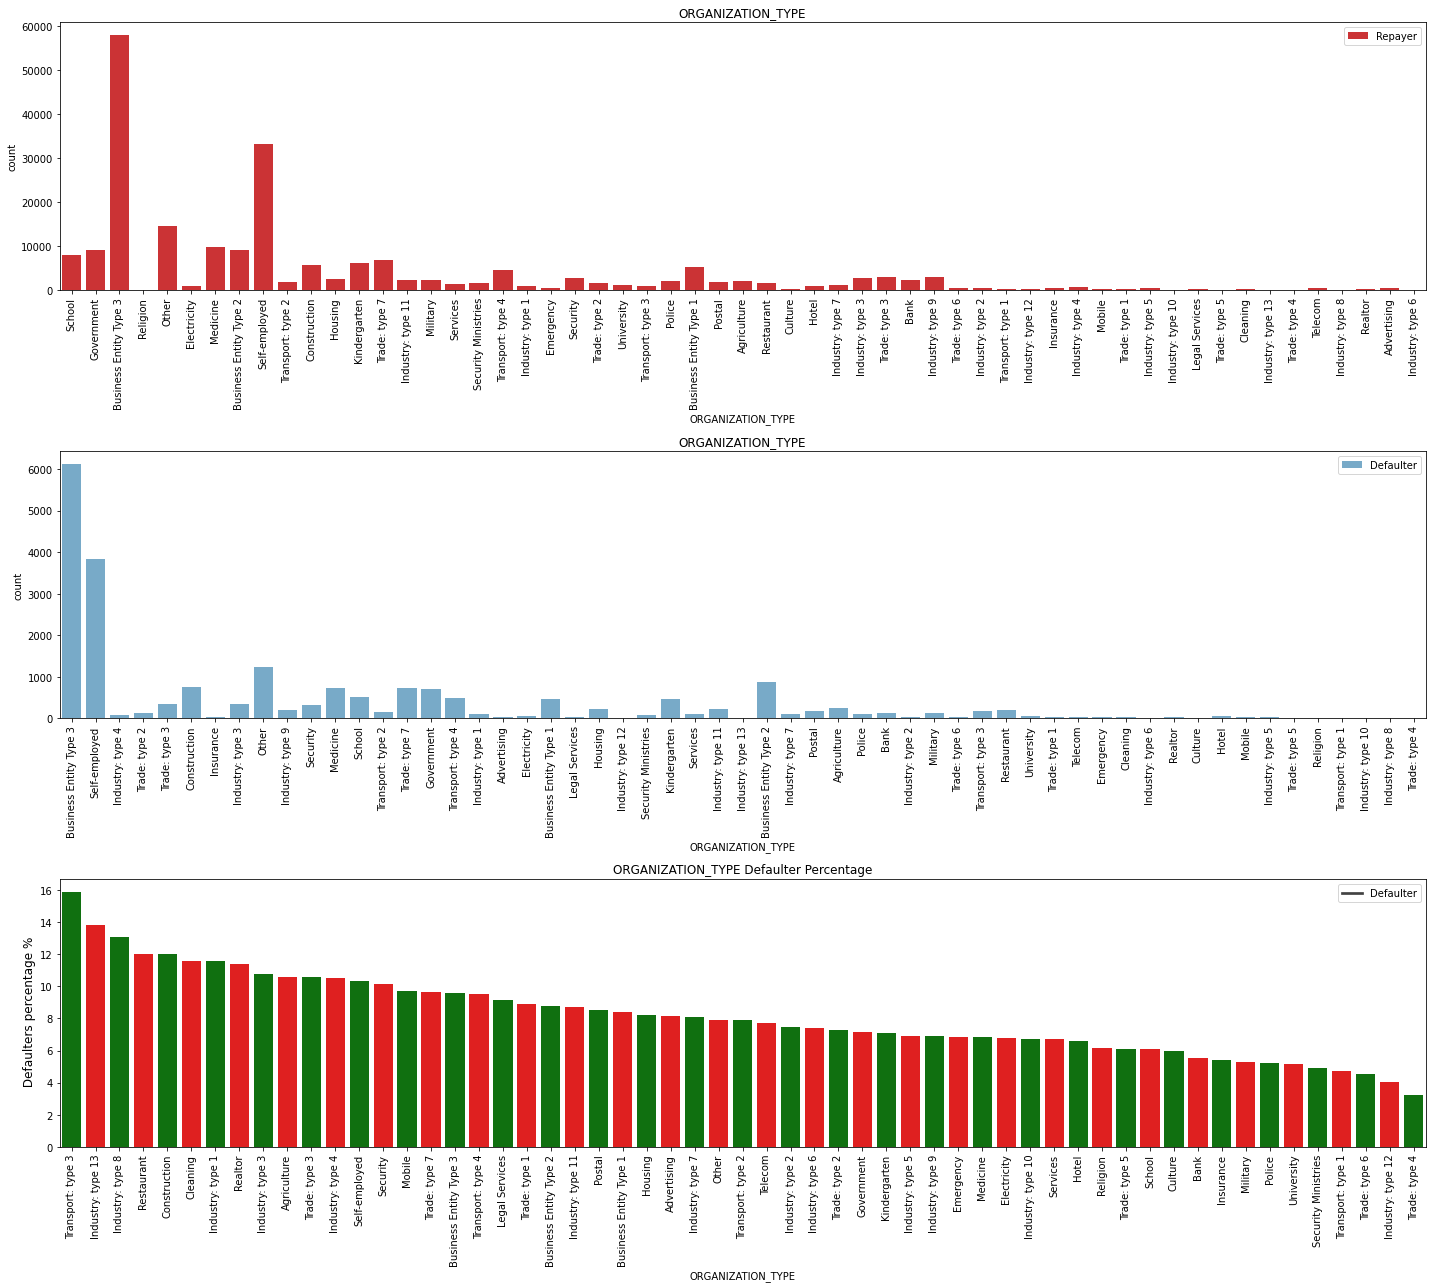

In [114]:
univariate_analysis('ORGANIZATION_TYPE',True,False)

In [115]:
#Majority of the applicants are from Business Entity type 3 followed by self-employed.
#Transport type 3 (approx:16%) followed by industry type 13 (approx 13%), industry type 8 (approx:12.5%)  of defaulters
#loan can be sanction to Clients with organization type Trade type 4 and industry type 12 as they have lowest defaulter rate

# AGE_GROUP

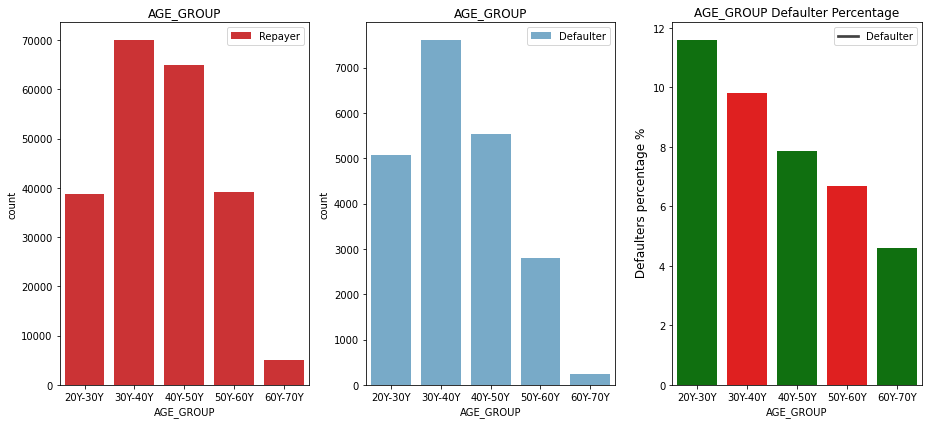

In [116]:
univariate_analysis('AGE_GROUP')

In [117]:
#Clients within age group of 30 to 60 have the highest applicants.
#Client with age between 20-30 have highest risk of giving loan as they have high defaulter percentage

# Univariate analysis on numerical cols

# AMT_CREDIT_RANGE

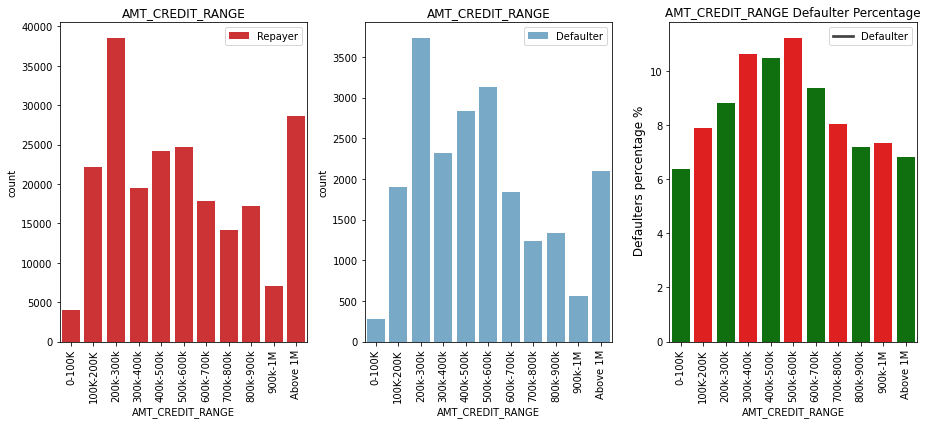

In [118]:
univariate_analysis('AMT_CREDIT_RANGE',True)

In [119]:
#large number of the clients have been granted loan for amount between 100k-300k.
#Mostly loan credited to the clients is less than 900k.
#very less amounts of clients have beenn credited with the loan amount more than 1M.
# loan credited between 300k to 600k has more percentage of defaulter.


# EMPLOYMENT_GROUP

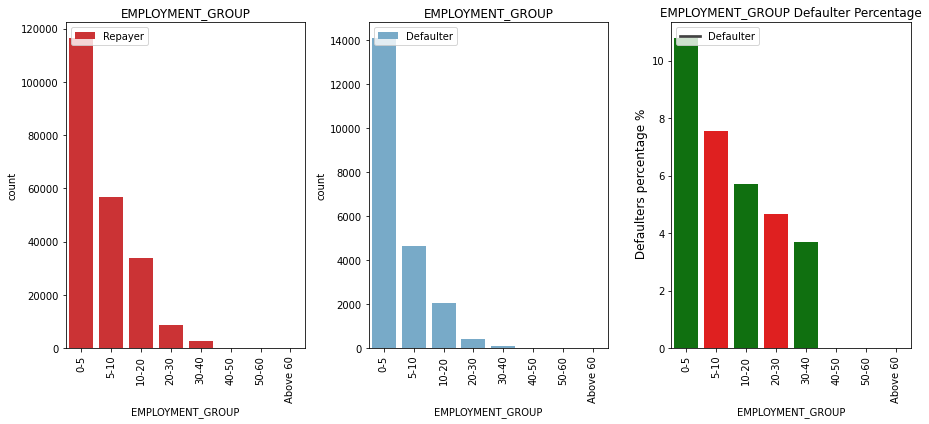

In [120]:
univariate_analysis('EMPLOYMENT_GROUP',True)

In [121]:
#majority of applicants lies in the range of work experience of 0 to 5 years
#0-5 years has high defaulter percentage
#As the work experience goes on increasing default rate goes down

# AMT_INCOME_TOTAL_RANGE

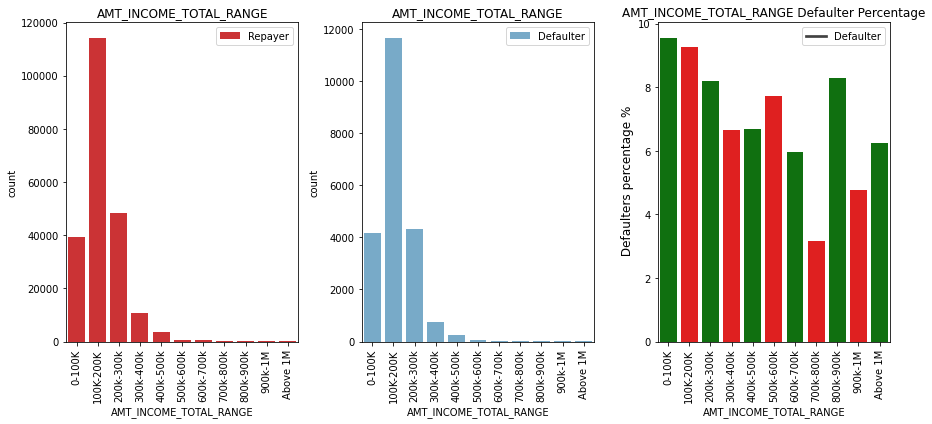

In [122]:
univariate_analysis('AMT_INCOME_TOTAL_RANGE',True)

In [123]:
#.Majority of the clients have the income range bewteen 100k-200k.
#clients with income range of 0-100k followed by the clients with income range of 100-200k.

# CNT_FAM_MEMBERS

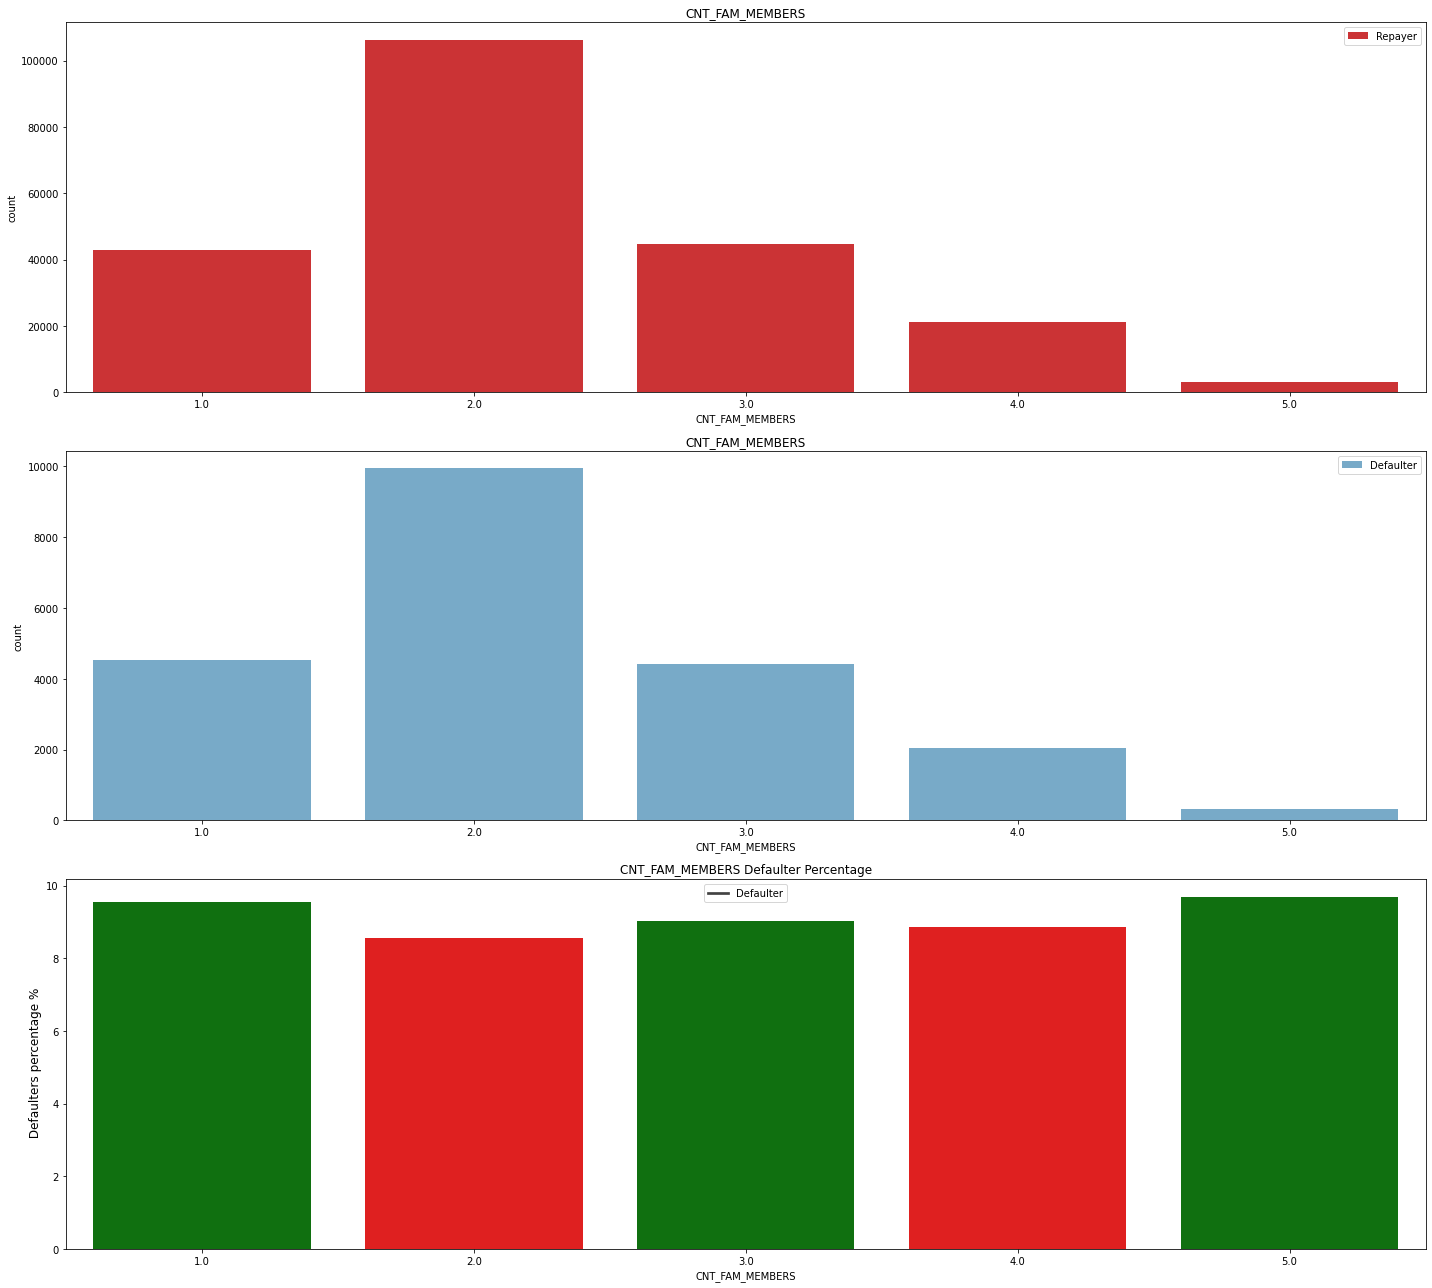

In [124]:
univariate_analysis('CNT_FAM_MEMBERS', False, False)

In [125]:
#Majority of the clients are having 0 members in the family followed by 1,2 and 4.
#We can see clients with members 29 and 23 have high defaulter rate.

# CNT_CHILDREN

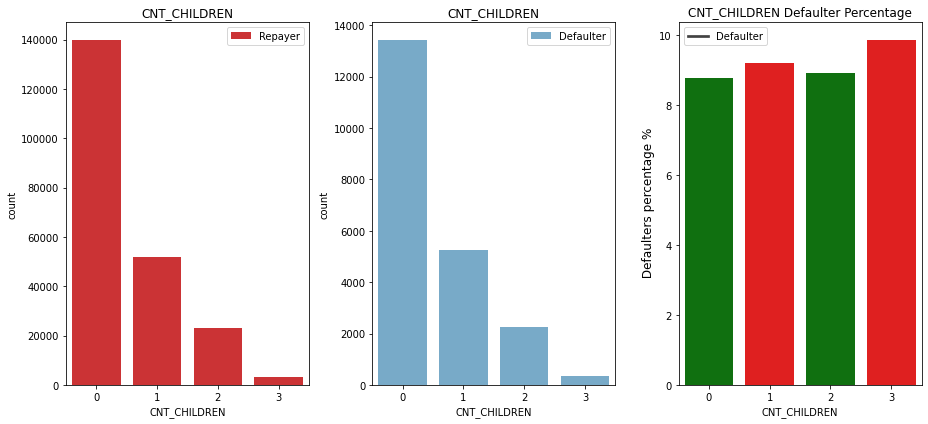

In [126]:
univariate_analysis('CNT_CHILDREN')

In [127]:
#Majority of the clients have no childrens.
#very less applicants have 3 childrens
#clients with 3 childeren have highest default value

# correlation table for numerical variables for bank_application

In the bank_application set, there are 25 numerical and 22 categorical variables in the data set
numeric_columns
SK_ID_CURR
TARGET
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
TO_sub_doc


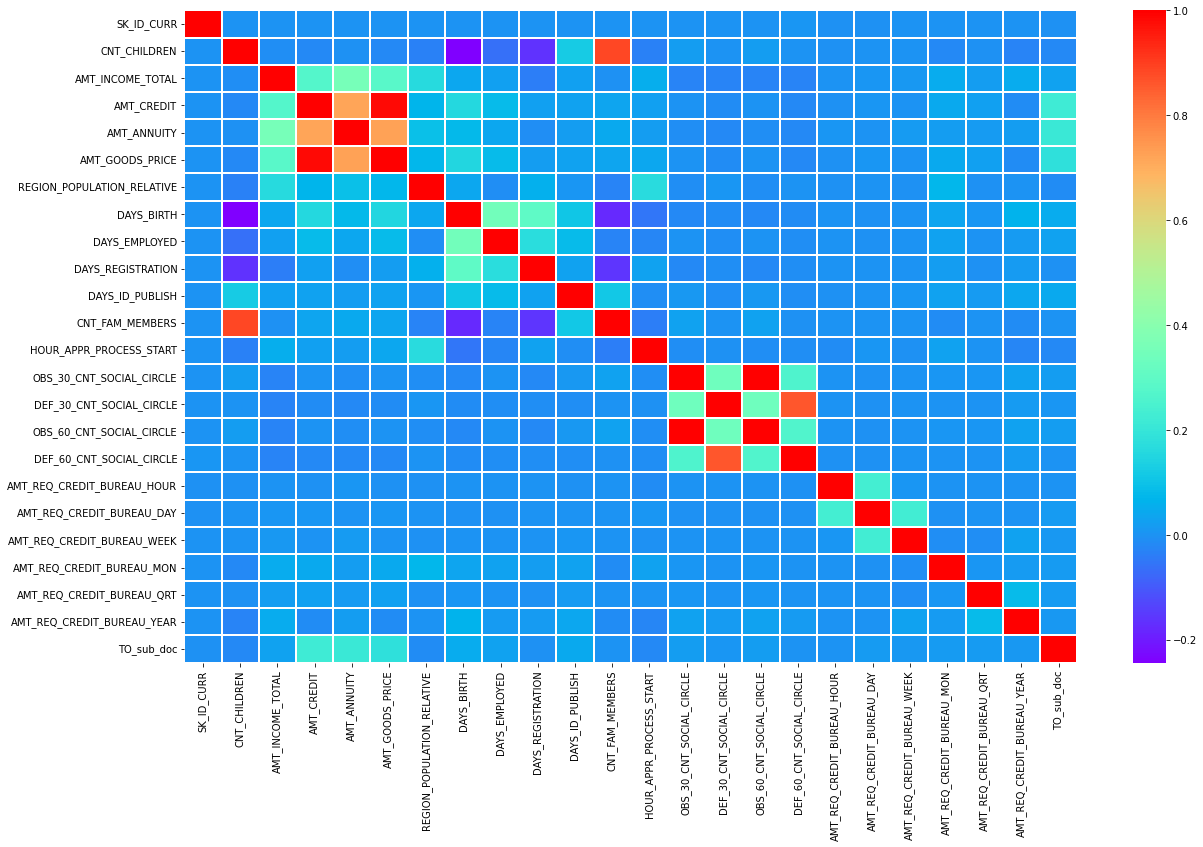

In [128]:
#plotting the correlation table for numerical variables
numeric_columns = bank_application.select_dtypes(include = [np.number])
categorical_columns = bank_application.select_dtypes(exclude = [np.number])
print('In the bank_application set, there are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))
print("numeric_columns")
for col in numeric_columns.columns:
    print(col)
fig = plt.figure(figsize=(20,12))
ax = sns.heatmap(Target_0[numeric_columns.columns].corr(),annot=False,linewidth =1,cmap='rainbow')

In [129]:
#AMT_GOODS_PRICE and AMT_CREDIT credit are highly correlated
#CNT_FAM_MEMBERS and CNT_CHILDREN are also highly correlated
#AMT_GOODS_PRICE and AMT_ANNUITY are Moderately correalted
#AMT_ANNUITY and AMT_CREDIT are also moderately correlated
#DAYS_EMPLOYED and DAYS_BIRTH are also correlated with each other

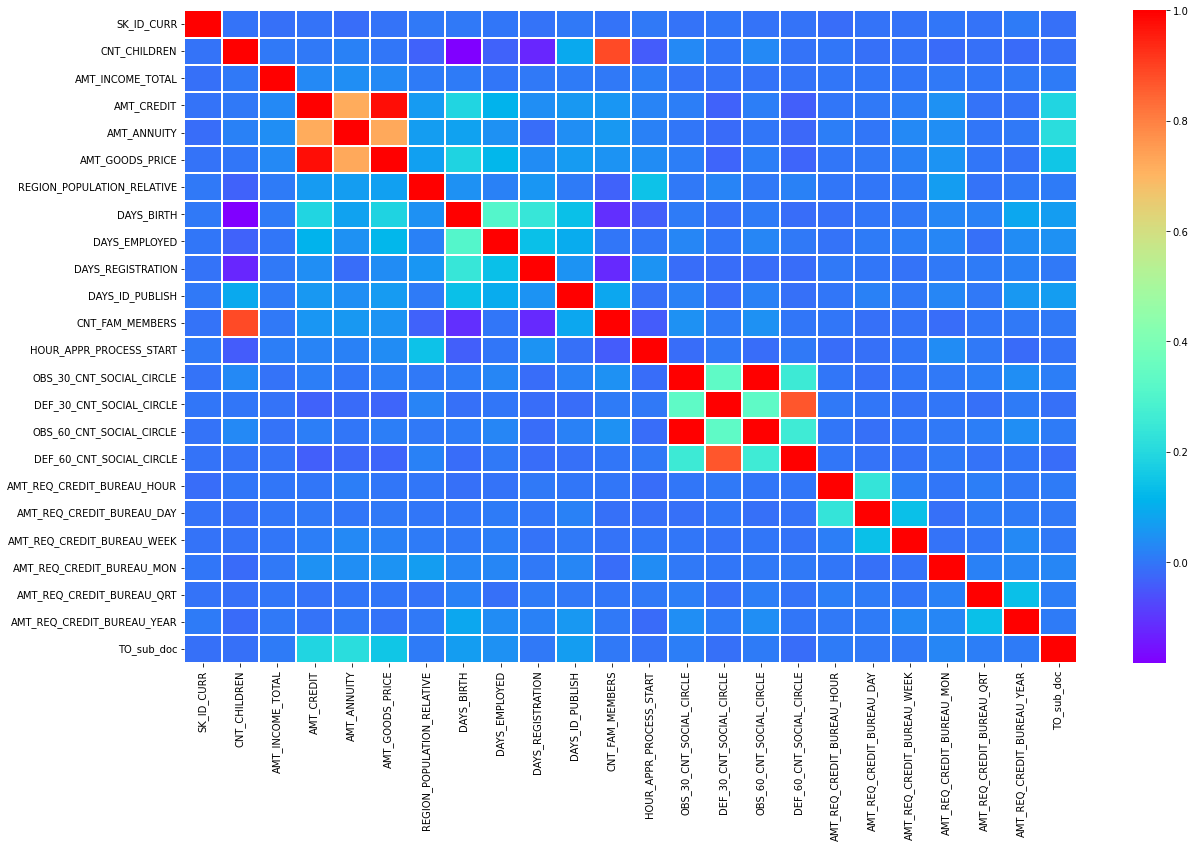

In [130]:
#plot for target_1
fig = plt.figure(figsize=(20,12))
ax = sns.heatmap(Target_1[numeric_columns.columns].corr(),annot=False,linewidth =1,cmap='rainbow')

In [131]:
#AMT_GOODS_PRICE AMT_CREDIT are higly correlated
#CNT_FAM_MEMBERS and CNT_CHILDREN are moderately correlated
#AMT_GOODS_PRICE and AMT_ANNUITY are moderately correlated
#AMT_ANNUITY and AMT_CREDIT are also correlated with each other

# BIVARIATE ANALYSIS on bank application data

# EDUCATION TYPE AND GENDER

Text(0, 0.5, 'Defaulters')

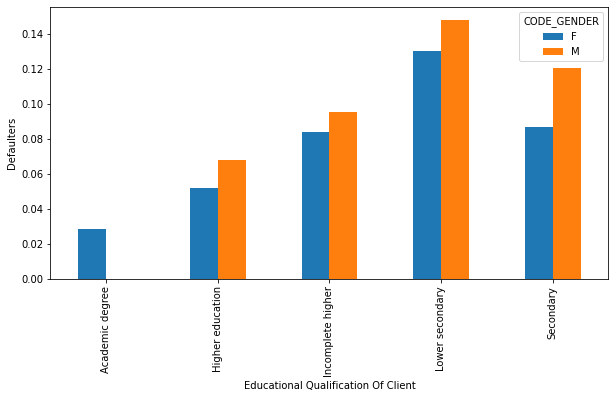

In [132]:
bank_application.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,5),rot=90)
plt.xlabel('Educational Qualification Of Client')
plt.ylabel('Defaulters')

In [133]:
#Males and female applicant with Lower secondary Educational Qualification have higher defaulter rate
# males clients with Secondary have higher defaulter rate
#client with academic degree and higher education have low defaulter rate.

# AMOUNT CREDIT RANGE AND AGE GROUP

Text(0, 0.5, 'Defaulters')

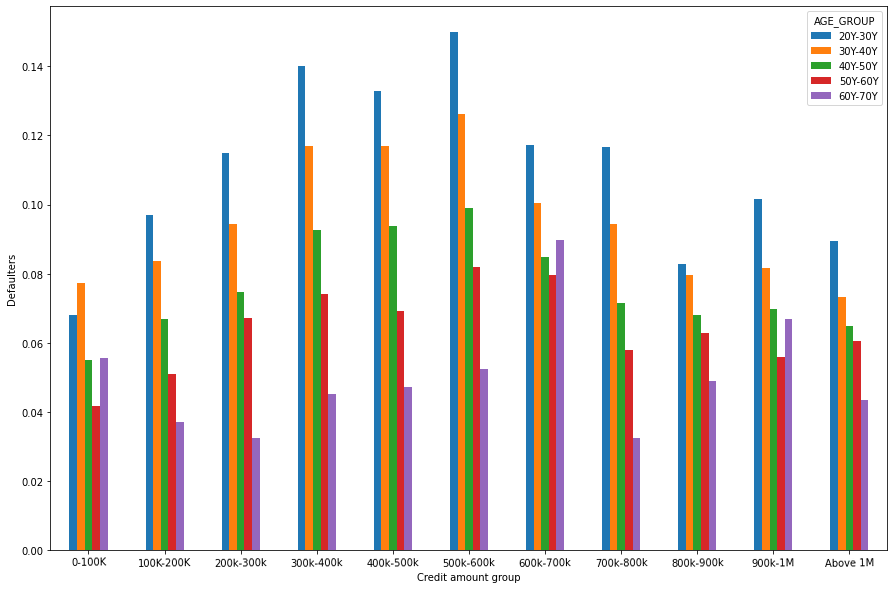

In [134]:
bank_application.pivot_table(values='TARGET',index='AMT_CREDIT_RANGE',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(15,10),rot=1)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

In [135]:
# can see that yooung clients 20-30yr with the average income of 300k-600k have the most default rates.
# All the senior citizens 60Y-70Y are less liekly to be defaults.

# AMT_INCOME_TOTAL_RANGE and GENDER

Text(0, 0.5, 'Defaulters')

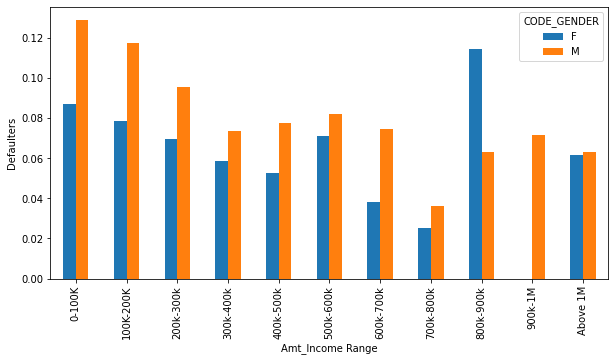

In [136]:
bank_application.pivot_table(values='TARGET',index='AMT_INCOME_TOTAL_RANGE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,5),rot=90)
plt.xlabel('Amt_Income Range')
plt.ylabel('Defaulters')

In [137]:
#Male and female in the income range 0 to 100k and 100k to 200k have equal default rate around 10% to 12%
#Females with income range above 1M are more likely to default than males

# INCOME TYPE AND GENDER

Text(0, 0.5, 'Defaulters')

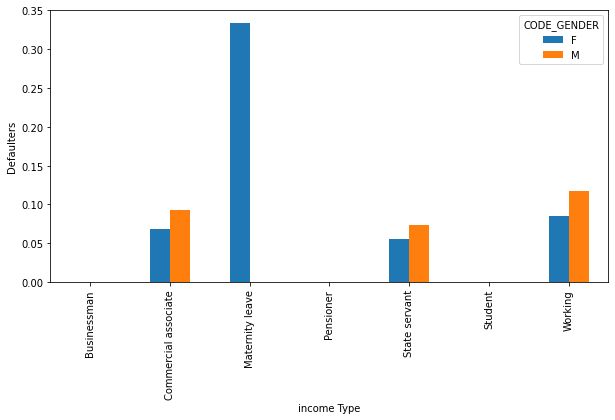

In [138]:
bank_application.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,5),rot=90)
plt.xlabel('income Type')
plt.ylabel('Defaulters')

In [139]:
#Businessman,student,pensioner in both male and female have no default rate
#Female  clients who are at maternity leave have the highest cahnces of defaulter rate.
#.Overall males have more defaulter rate in all the Income types except Businessman,student,pensioner 

# FAMILY STATUS AND AGE GROUP

Text(0, 0.5, 'Defaulters')

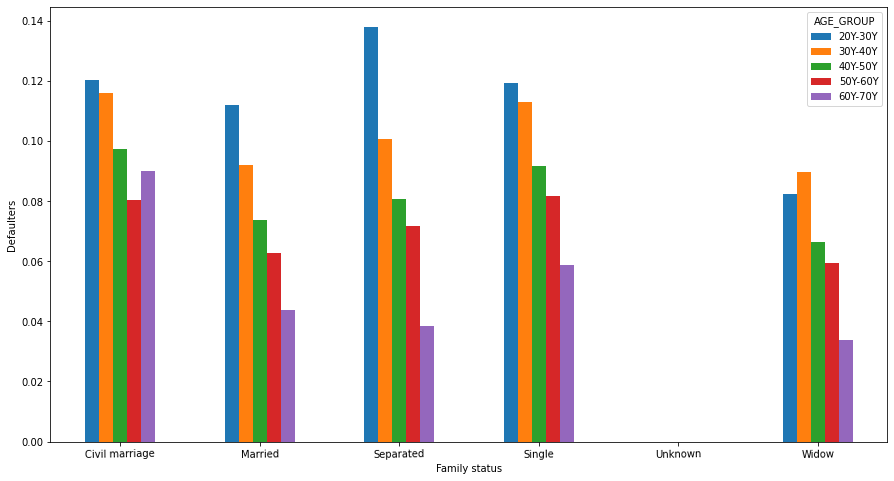

In [140]:
bank_application.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(15,8),rot=1)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

In [141]:
#we can see that clients age between 20-30Y have higher percentage of defaulters in all the status except widow.
#Lowest defaulter rate are the cleints who are elderly age between 60Y-70Y

# FAMILY STATUS AND CODE GENDER

Text(0, 0.5, 'Defaulters')

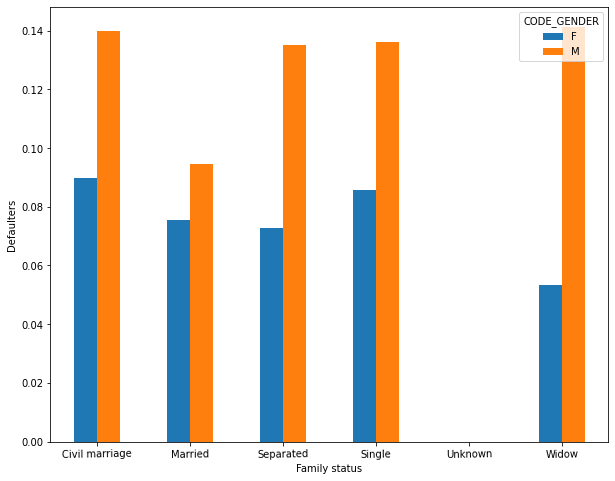

In [142]:
bank_application.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,8),rot=1)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

In [143]:
#We can see that whichever the family status is, male clients are the ones with high default rate.
#Females have higher default rates with the family status of civil marriage followed by single and married

# Conclusion: Final Inference

In [144]:
#After analysing the given datasets, there are few variable of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consider as below with the contributing factors and categorization are safest and danger:
#safest categories to offer loans:
#NAME_EDUCATION_TYPE: client with academic degree.
#NAME_INCOME_TYPE: Students and Businessmen
#ORGANIZATION_TYPE: People with Trade Type 4 and Industry type 12
#DAYS_BIRTH: client above age of above 40 mid age clients
#AMT_INCOME_TOTAL: People with Income 700k-800k

#Overall Recommendations
#It is more safe to grant the loan to mid age clients and senior citizen clients with higher income.
#Loan can be granteed to highly educated clients because thier is very less chance of them being a defaulter.
#Overall females have less chance of being a defaulter than males so loan can be granted to them.
#Married cleints should also be given loans beacuse it has less defaulter rate as compared to other family status.
#Clients who were previously refused and reapplied, checks should be made not only for their current info/status but also the reason of their previous rejection.

#The riskier categories to offer loans:

#CODE_GENDER: Men

#NAME_FAMILY_STATUS: Civil marriage or Single

#NAME_EDUCATION_TYPE: Lower Secondary or Secondary

#NAME_INCOME_TYPE: Maternity leave or Unemployed

#oCCUPATION_TYPE: Low-skill Laborers (riskiest), Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff

#ORGANIZATION_TYPE: Transport: type 3 (riskiest), Industry: type 13, Industry: type 8

#DAYS_BIRTH: age group of 20-40

#DAYS_EMPLOYED:  (0-5 )less than 5 years

#Overall Risks
#Clients with low income groups income range 0 to 100k and 100k to 200k should be avoided because of higher chances of being defaulter.
#Unemployed clients can also be a big risk factor for providing with loan.
#External credit score should be also considered before approving the clients appplication as it consits of clients credit score.
#Lower secondary and secondary educated clients should be avoided for loan as they have high defaulter rates

#SOME IMPORTANT VARIABLES
#These are some variables from the data that can be monitored and analyzed to get desired information.

#AGE GROUP(Derived from DAYS_BIRTH)
#YEARS_EMPLOYED
#NAME_CONTRACT TYPE
#CODE_GENDER(Derived from GENDER )
#FLAG_OWN_REALTY
#FLAG_OWN_CAR
#NAME_INCOME_TYPE
#OCCUPATION_TYPE
#NAME_EDUCATIO_TYPE
#AMOUNT_INCOME_RANGE(Binned from AMT_INCOME_TOTAL)
#NAME_INCOME_TYPE
#NAME_PORTFOLIO
#NAME_EDUCATION_TYPE
#LOAN PURPOSE
#ORGANIZATION_TYPE
#DAYS_EMPLOYED
#NAME_CONTRACT_STATUS
#TARGET
 

# Developing a Model 

In [145]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [146]:
#From the above Observation:

#It can be observed that the Target Variable distribution is very much skewed towards one class. Hence, there is imbalanced data.

In [147]:
bank_application.shape

(239115, 47)

In [148]:
bank_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU

# Treating the Imbalanced Data

In [149]:
#Treat the Imbalanced Data by using Re-Sampeling technique (Random Under-Sampeling)
# get all data with target label 0 ( client with no payment difficulties)
target_0 = bank_application[bank_application.TARGET==0]
target_0.shape

(217849, 47)

In [150]:
# get all data with target label 1 (client with payment difficulties)

target_1 = bank_application[bank_application.TARGET==1]
target_1.shape

(21266, 47)

# under sampling

In [151]:
# Perform Random Sampeling on target label 0 data. I am taking 0.1 % as data sampeling rate. 

sampled_target_0 = target_0.sample(frac=0.1,random_state=2)
sampled_target_0.shape

(21785, 47)

In [152]:
# create a balanced dataframe by combining both the above data

balanced_data = target_1.append(sampled_target_0,ignore_index=True)
balanced_data.shape

(43051, 47)

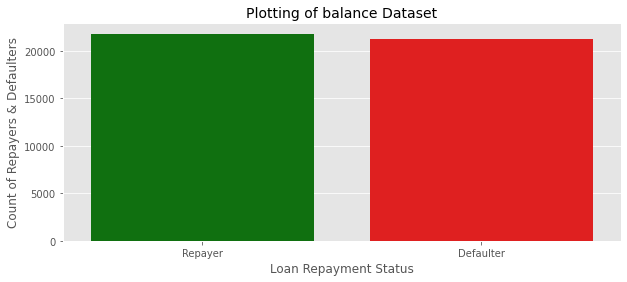

In [153]:
#Plotting the Target Variables for balanced_data. This distribution is appropriate for carrying predictions on prediction models
class_balance=balanced_data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
plot= ['Repayer','Defaulter']
sns.barplot(plot,"TARGET",data = class_balance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status",fontsize=12)
plt.ylabel("Count of Repayers & Defaulters",fontsize=12)
plt.title("Plotting of balance Dataset",fontsize=14)
plt.show()

In [154]:
balanced_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_

In [155]:
#It is understood that I can remove the SK_ID_CURR feature because it is the Loan ID in the loan application, and it does not tell anything, that results in target.
balanced_data = balanced_data.drop('SK_ID_CURR',axis=1)
balanced_data.shape

(43051, 46)

In [156]:
# check which columns have only one value which has no effect to our data

nunique = balanced_data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index([], dtype='object')

In [157]:
# How big the loan a person has taken with respect to his earnings, income to credit loan amount ratio
balanced_data['CREDIT_LOAN_TO_INCOME'] = balanced_data['AMT_CREDIT']/balanced_data['AMT_INCOME_TOTAL']

In [158]:

#checking for  any duplicate rows which leads to ambiguity in target variables.
duplicateRowsDF = balanced_data[balanced_data.duplicated()]
duplicateRowsDF

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TO_sub_doc,AGE_GROUP,EMPLOYMENT_GROUP,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,CREDIT_LOAN_TO_INCOME
20608,1,Cash loans,M,Y,Y,0,1.8,5.9256,31153.5,450000.0,...,0.0,0.0,0.0,4.0,1,40Y-50Y,0-5,100K-200K,500k-600k,3.292


In [159]:
balanced_data.drop_duplicates(inplace=True)

In [160]:
#Here I get a new feature engineered and processed dataframe with 47 features
print(balanced_data.shape)
balanced_data

(43050, 47)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TO_sub_doc,AGE_GROUP,EMPLOYMENT_GROUP,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,CREDIT_LOAN_TO_INCOME
0,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,...,0.0,0.0,0.0,1.0,1,20Y-30Y,0-5,200k-300k,400k-500k,2.007889
1,1,Cash loans,F,N,Y,0,1.125,9.799920,27076.5,702000.0,...,0.0,0.0,2.0,2.0,2,50Y-60Y,5-10,100K-200K,900k-1M,8.711040
2,1,Cash loans,M,N,Y,0,2.025,11.935800,35028.0,855000.0,...,0.0,2.0,0.0,4.0,1,40Y-50Y,0-5,200k-300k,Above 1M,5.894222
3,1,Cash loans,F,N,N,0,1.350,2.888730,16258.5,238500.0,...,0.0,0.0,0.0,2.0,1,30Y-40Y,5-10,100K-200K,200k-300k,2.139800
4,1,Cash loans,M,Y,Y,0,3.150,9.534600,64107.0,900000.0,...,0.0,0.0,0.0,2.0,1,20Y-30Y,5-10,300k-400k,900k-1M,3.026857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,0,Cash loans,F,N,Y,1,2.025,11.340000,31185.0,1134000.0,...,0.0,2.0,1.0,1.0,1,40Y-50Y,5-10,200k-300k,Above 1M,5.600000
43047,0,Cash loans,M,Y,Y,2,2.700,5.850000,16218.0,585000.0,...,0.0,0.0,0.0,3.0,0,30Y-40Y,0-5,200k-300k,500k-600k,2.166667
43048,0,Cash loans,M,N,Y,0,1.800,3.233880,34956.0,292500.0,...,0.0,0.0,0.0,1.0,1,30Y-40Y,0-5,100K-200K,300k-400k,1.796600
43049,0,Cash loans,F,N,N,0,1.350,6.746355,32584.5,603000.0,...,0.0,0.0,0.0,1.0,1,50Y-60Y,20-30,100K-200K,600k-700k,4.997300


In [161]:
#converting categorial values to numerical using LabelEncoder
# finding the categorical columns

cat_df= balanced_data.select_dtypes(include=np.object)
cat_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary,Single,House / apartment,Laborers,WEDNESDAY,N,N,N,N,N,N,Business Entity Type 3
1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary,Widow,House / apartment,Cooking staff,MONDAY,N,N,N,N,N,N,Business Entity Type 3
2,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary,Married,House / apartment,Laborers,TUESDAY,N,N,N,N,N,N,Business Entity Type 3
3,Cash loans,F,N,N,Unaccompanied,Working,Secondary,Civil marriage,House / apartment,Sales staff,THURSDAY,N,N,N,N,N,N,Self-employed
4,Cash loans,M,Y,Y,Family,Commercial associate,Incomplete higher,Single,With parents,Unknown,SUNDAY,N,N,N,N,Y,Y,Industry: type 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,Cash loans,F,N,Y,Unaccompanied,Working,Secondary,Married,House / apartment,Core staff,THURSDAY,N,N,N,N,Y,Y,Trade: type 7
43047,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Managers,SATURDAY,N,N,N,N,N,N,Business Entity Type 3
43048,Cash loans,M,N,Y,Unaccompanied,Working,Secondary,Married,House / apartment,Laborers,SUNDAY,N,N,N,N,N,N,Business Entity Type 3
43049,Cash loans,F,N,N,Unaccompanied,Working,Secondary,Married,Municipal apartment,Accountants,MONDAY,N,N,N,N,N,N,Transport: type 2


In [162]:
# finding the numerical columns

num_df= balanced_data.select_dtypes(include=np.number)
num_df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TO_sub_doc,CREDIT_LOAN_TO_INCOME
0,1,0,2.025,4.065975,24700.5,351000.0,0.018801,25.920548,1.745205,3648.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2.007889
1,1,0,1.125,9.799920,27076.5,702000.0,0.018029,51.298630,7.200000,6573.0,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2,8.711040
2,1,0,2.025,11.935800,35028.0,855000.0,0.025164,47.895890,3.457534,1182.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,1,5.894222
3,1,0,1.350,2.888730,16258.5,238500.0,0.007305,36.668493,9.854795,45.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,2.139800
4,1,0,3.150,9.534600,64107.0,900000.0,0.030755,27.942466,5.520548,4802.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,3.026857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,0,1,2.025,11.340000,31185.0,1134000.0,0.035792,44.117808,9.767123,6776.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1,5.600000
43047,0,2,2.700,5.850000,16218.0,585000.0,0.031329,35.043836,1.852055,270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,2.166667
43048,0,0,1.800,3.233880,34956.0,292500.0,0.046220,32.161644,1.350685,773.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.796600
43049,0,0,1.350,6.746355,32584.5,603000.0,0.008019,50.989041,26.323288,2160.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4.997300


In [163]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# applying LabelEncoder() to all the categorical columns
encoded_cat_df=cat_df.apply(LabelEncoder().fit_transform)
encoded_cat_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,0,1,0,1,6,6,4,3,1,8,6,0,0,0,0,0,0,5
1,0,0,0,1,6,6,4,4,1,2,1,0,0,0,0,0,0,5
2,0,1,0,1,6,1,4,1,1,8,5,0,0,0,0,0,0,5
3,0,0,0,0,6,6,4,0,1,14,4,0,0,0,0,0,0,42
4,0,1,1,1,1,1,2,3,5,17,3,0,0,0,0,1,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,0,0,0,1,6,6,4,1,1,3,4,0,0,0,0,1,1,51
43047,0,1,1,1,6,1,1,1,1,10,2,0,0,0,0,0,0,5
43048,0,1,0,1,6,6,4,1,1,8,3,0,0,0,0,0,0,5
43049,0,0,0,0,6,6,4,1,2,0,1,0,0,0,0,0,0,53


In [164]:
# Normalizing the encoded data. You can also use sklearn's inbuilt preproccesing package MinMaxScaler() for doing the below normalization
normalized_cat_df=(encoded_cat_df-encoded_cat_df.min())/(encoded_cat_df.max()-encoded_cat_df.min())
normalized_cat_df


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,0.0,1.0,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.444444,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
1,0.0,0.0,0.0,1.0,1.000000,1.000000,1.00,1.00,0.2,0.111111,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
2,0.0,1.0,0.0,1.0,1.000000,0.166667,1.00,0.25,0.2,0.444444,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
3,0.0,0.0,0.0,0.0,1.000000,1.000000,1.00,0.00,0.2,0.777778,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.750000
4,0.0,1.0,1.0,1.0,0.166667,0.166667,0.50,0.75,1.0,0.944444,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,0.0,0.0,0.0,1.0,1.000000,1.000000,1.00,0.25,0.2,0.166667,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.910714
43047,0.0,1.0,1.0,1.0,1.000000,0.166667,0.25,0.25,0.2,0.555556,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
43048,0.0,1.0,0.0,1.0,1.000000,1.000000,1.00,0.25,0.2,0.444444,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
43049,0.0,0.0,0.0,0.0,1.000000,1.000000,1.00,0.25,0.4,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.946429


In [165]:
normalized_num_df=(num_df-num_df.min())/(num_df.max()-num_df.min())
normalized_num_df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TO_sub_doc,CREDIT_LOAN_TO_INCOME
0,1.0,0.000000,0.001500,0.216076,0.197232,0.237931,0.253810,0.101944,0.043660,0.166842,...,0.068966,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.043478,0.25,0.066343
1,1.0,0.000000,0.000731,0.558713,0.218169,0.506897,0.243084,0.631561,0.180123,0.300617,...,0.344828,0.000000,0.0,0.0,0.0,0.000000,0.105263,0.086957,0.50,0.288353
2,1.0,0.000000,0.001500,0.686345,0.288235,0.624138,0.342216,0.560549,0.086498,0.054059,...,0.000000,0.000000,0.0,0.0,0.0,0.105263,0.000000,0.173913,0.25,0.195059
3,1.0,0.000000,0.000923,0.145729,0.122844,0.151724,0.094088,0.326244,0.246539,0.002058,...,0.034483,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.086957,0.25,0.070712
4,1.0,0.000000,0.002462,0.542859,0.544470,0.658621,0.419896,0.144140,0.138108,0.219620,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.086957,0.25,0.100091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,0.0,0.333333,0.001500,0.650742,0.254372,0.837931,0.489878,0.481704,0.244345,0.309902,...,0.000000,0.000000,0.0,0.0,0.0,0.105263,0.052632,0.043478,0.25,0.185314
43047,0.0,0.666667,0.002077,0.322682,0.122487,0.417241,0.427871,0.292338,0.046333,0.012349,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.130435,0.00,0.071601
43048,0.0,0.000000,0.001308,0.166353,0.287601,0.193103,0.634762,0.232190,0.033790,0.035353,...,0.137931,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.043478,0.25,0.059345
43049,0.0,0.000000,0.000923,0.376245,0.266704,0.431034,0.104008,0.625100,0.658533,0.098788,...,0.068966,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.043478,0.25,0.165353


In [166]:
#Now combine the both dataframes in to one single final dataframe which will be used for doing the further steps i.e Train-Test splits for model fitting and predicitions and evaluations
final_df= pd.concat([normalized_num_df,normalized_cat_df],axis=1)
final_df= final_df.reset_index(drop=True)
final_df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,1.0,0.000000,0.001500,0.216076,0.197232,0.237931,0.253810,0.101944,0.043660,0.166842,...,0.2,0.444444,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
1,1.0,0.000000,0.000731,0.558713,0.218169,0.506897,0.243084,0.631561,0.180123,0.300617,...,0.2,0.111111,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
2,1.0,0.000000,0.001500,0.686345,0.288235,0.624138,0.342216,0.560549,0.086498,0.054059,...,0.2,0.444444,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
3,1.0,0.000000,0.000923,0.145729,0.122844,0.151724,0.094088,0.326244,0.246539,0.002058,...,0.2,0.777778,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.750000
4,1.0,0.000000,0.002462,0.542859,0.544470,0.658621,0.419896,0.144140,0.138108,0.219620,...,1.0,0.944444,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43045,0.0,0.333333,0.001500,0.650742,0.254372,0.837931,0.489878,0.481704,0.244345,0.309902,...,0.2,0.166667,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.910714
43046,0.0,0.666667,0.002077,0.322682,0.122487,0.417241,0.427871,0.292338,0.046333,0.012349,...,0.2,0.555556,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
43047,0.0,0.000000,0.001308,0.166353,0.287601,0.193103,0.634762,0.232190,0.033790,0.035353,...,0.2,0.444444,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
43048,0.0,0.000000,0.000923,0.376245,0.266704,0.431034,0.104008,0.625100,0.658533,0.098788,...,0.4,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.946429


# Data Split and Model Validation

In [167]:
#using Three-way hold out strategy 
#using cross_val_score function of sklearn which performs cross-validation.
Y= num_df.iloc[:,0]
Y.shape
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: TARGET, dtype: int64

In [168]:
X = final_df.iloc[:,1:]
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,0.0,0.001500,0.216076,0.197232,0.237931,0.253810,0.101944,0.043660,0.166842,0.341330,...,0.2,0.444444,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
1,0.0,0.000731,0.558713,0.218169,0.506897,0.243084,0.631561,0.180123,0.300617,0.294156,...,0.2,0.111111,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
2,0.0,0.001500,0.686345,0.288235,0.624138,0.342216,0.560549,0.086498,0.054059,0.165674,...,0.2,0.444444,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.089286
3,0.0,0.000923,0.145729,0.122844,0.151724,0.094088,0.326244,0.246539,0.002058,0.709870,...,0.2,0.777778,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.750000
4,0.0,0.002462,0.542859,0.544470,0.658621,0.419896,0.144140,0.138108,0.219620,0.167123,...,1.0,0.944444,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.375000


In [169]:
#data splitting
from sklearn.model_selection import train_test_split


x_train_plus_valid, x_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

x_train, x_valid, y_train, y_valid \
    = train_test_split(x_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.55/0.7)

In [170]:
x_train.shape, y_train.shape

((23676, 42), (23676,))

In [171]:
x_test.shape, y_test.shape

((12916, 42), (12916,))

In [172]:
# Plot ROC curve definition ( function to plot the ROC curve)
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def pltAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='brown', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [173]:
# dictionary to store the cross_validations scores of all the models
cross_val_mean_scores_comparisons = dict()

# Machine Learning Algorithm training

# Logistic Regression

In [174]:
# importing the model and fitting with training data

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [175]:
# Assess the performance of this model on the validation set

pred=lr.predict(x_valid)

logistic_accuracy = accuracy_score(y_valid, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6029730566738929
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      3242
           1       0.60      0.61      0.60      3216

    accuracy                           0.60      6458
   macro avg       0.60      0.60      0.60      6458
weighted avg       0.60      0.60      0.60      6458



In [176]:
# Assess the performance of this model on the test set

pred=lr.predict(x_test)
lrPredictproba = lr.predict_proba(x_test)[:,1] #for ROC curve

logistic_accuracy = accuracy_score(y_test, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.6151285227624652
              precision    recall  f1-score   support

           0       0.62      0.61      0.62      6551
           1       0.61      0.62      0.61      6365

    accuracy                           0.62     12916
   macro avg       0.62      0.62      0.62     12916
weighted avg       0.62      0.62      0.62     12916



In [177]:
# Use a cross validation to perform model validation and evaluation

# used x_train_plus_valid and y_train_plus_valid data because it is the main training data.

from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr,x_train_plus_valid,y_train_plus_valid,cv=10)

# store the mean score to the defined dictionary
cross_val_mean_scores_comparisons["Logistic "] = lr_scores.mean()

lr_scores.mean()

0.6142893843554728

# grid_search

In [178]:
grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.0001,0.00001,0.0001]}

In [179]:
grid_search = GridSearchCV(estimator = lr, param_grid = grid, cv = 3)

In [180]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05, 0.0001]})

In [181]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(penalty='none', solver='newton-cg')


In [182]:
lr = LogisticRegression(solver='liblinear',penalty='l2',verbose=True)
lr.fit(x_train, y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=True)

In [183]:
# the performance of this model on the validation set after hyper para tuning

pred=lr.predict(x_valid)

logistic_accuracy = accuracy_score(y_valid, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6028182099721275
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      3242
           1       0.60      0.61      0.60      3216

    accuracy                           0.60      6458
   macro avg       0.60      0.60      0.60      6458
weighted avg       0.60      0.60      0.60      6458



In [184]:
# the performance of this model on the test set

pred=lr.predict(x_test)
lrPredictproba = lr.predict_proba(x_test)[:,1] #for ROC curve

logistic_accuracy = accuracy_score(y_test, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.6152059461133478
              precision    recall  f1-score   support

           0       0.62      0.61      0.62      6551
           1       0.61      0.62      0.61      6365

    accuracy                           0.62     12916
   macro avg       0.62      0.62      0.62     12916
weighted avg       0.62      0.62      0.62     12916



In [185]:
ytrain_predict_log = lr.predict(x_train)
ytest_predict_log = lr.predict(x_test)

In [186]:
log_train_acc = lr.score(x_train, y_train)
log_train_acc


0.6177141409021795

In [187]:
log_test_acc = lr.score(x_test, y_test)
log_test_acc

0.6152059461133478

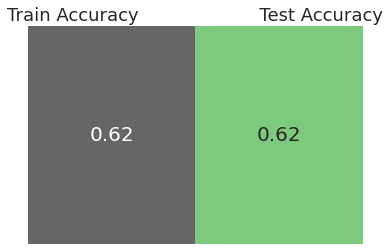

In [188]:
sns.heatmap(np.matrix([[log_train_acc,log_test_acc]]),annot=True,cmap='Accent',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()


AUC: 0.664


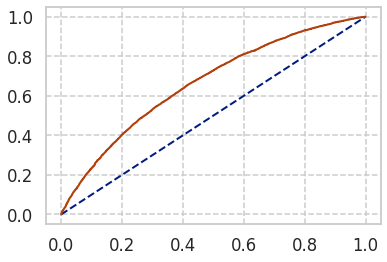

In [189]:
# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_log_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_log_train)
# calculate roc curve
train_fpr_log_train, train_tpr_log_train, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_log_train, train_tpr_log_train); 

AUC: 0.661


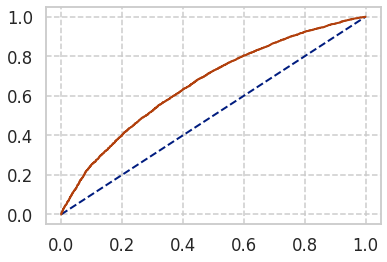

In [190]:

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_log_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc_log_test)
# calculate roc curve
test_fpr_log_test, test_tpr_log_test, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_log_test, test_tpr_log_test);

In [191]:

confusion_matrix(y_train, ytrain_predict_log)

array([[7375, 4617],
       [4434, 7250]])

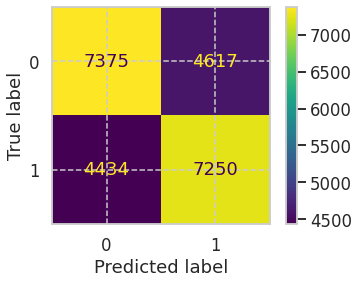

In [192]:
plot_confusion_matrix(lr,x_train,y_train);

In [193]:

confusion_matrix(y_test, ytest_predict_log)

array([[3984, 2567],
       [2403, 3962]])

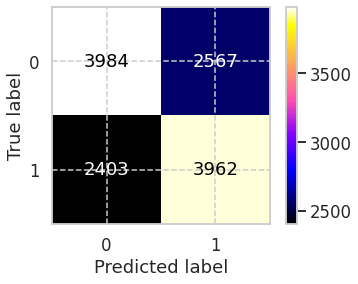

In [194]:
plot_confusion_matrix(lr,x_test,y_test,cmap="gnuplot2");

# Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [196]:
# Assess the performance of this model on the validation set

pred = rfc.predict(x_valid)

randomforest_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6063796841127284
              precision    recall  f1-score   support

           0       0.60      0.63      0.62      3242
           1       0.61      0.58      0.60      3216

    accuracy                           0.61      6458
   macro avg       0.61      0.61      0.61      6458
weighted avg       0.61      0.61      0.61      6458



In [197]:
# Assess the performance of this model on the test set

pred = rfc.predict(x_test)
rfPredictproba = rfc.predict_proba(x_test)[:,1] #for ROC curve

randomforest_accuracy = accuracy_score(y_test, pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.6164447197274698
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      6551
           1       0.62      0.59      0.60      6365

    accuracy                           0.62     12916
   macro avg       0.62      0.62      0.62     12916
weighted avg       0.62      0.62      0.62     12916



In [198]:
# Use a cross validation to perform model validation and evaluation

# used x_train_plus_valid and y_train_plus_valid data because it is the main training data.

rfc_scores = cross_val_score(rfc,x_train_plus_valid,y_train_plus_valid,cv=10)

cross_val_mean_scores_comparisons["Random Forest "] = rfc_scores.mean()

rfc_scores.mean()

0.6166459938805323

In [199]:
from scipy.stats import ks_2samp, randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'n_estimators':[10,20,50,100],'criterion': ['gini','entropy'],'max_features':[5,10,20],
             'max_depth':[15,None],'min_samples_split':sp_randint(2,21),'bootstrap':[True,False]}
random_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_distributions,n_iter=10,
                                  cv=5,verbose=2)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=20, min_samples_split=19, n_estimators=10; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=20, min_samples_split=19, n_estimators=10; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=20, min_samples_split=19, n_estimators=10; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=20, min_samples_split=19, n_estimators=10; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=20, min_samples_split=19, n_estimators=10; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=20, min_samples_split=4, n_estimators=50; total time=   6.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=15, max_features=20, min_samples_split=4, n_estimators=50; total time=   6.6s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [15, None],
                                        'max_features': [5, 10, 20],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efd4ba40f10>,
                                        'n_estimators': [10, 20, 50, 100]},
                   verbose=2)

In [200]:
print(random_search.best_score_)
print(random_search.best_estimator_)


0.619572333685322
RandomForestClassifier(criterion='entropy', max_depth=15, max_features=5,
                       min_samples_split=8)


In [201]:
randomForest = RandomForestClassifier(max_features=5, min_samples_split=18)
randomForest.fit(x_train, y_train)

RandomForestClassifier(max_features=5, min_samples_split=18)

In [202]:
# Assess the performance of this model on the validation set

pred = randomForest.predict(x_valid)

randomforest_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6184577268504181
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      3242
           1       0.62      0.61      0.62      3216

    accuracy                           0.62      6458
   macro avg       0.62      0.62      0.62      6458
weighted avg       0.62      0.62      0.62      6458



In [203]:
# Assess the performance of this model on the test set

pred = randomForest.predict(x_test)
rfPredictproba = randomForest.predict_proba(x_test)[:,1] #for ROC curve

randomforest_accuracy = accuracy_score(y_test, pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.6235676680086714
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      6551
           1       0.62      0.61      0.61      6365

    accuracy                           0.62     12916
   macro avg       0.62      0.62      0.62     12916
weighted avg       0.62      0.62      0.62     12916



In [204]:
ytrain_predict_log = randomForest.predict(x_train)
ytest_predict_log = randomForest.predict(x_test)

In [205]:
log_train_acc = randomForest.score(x_train, y_train)
log_train_acc


0.9572140564284507

In [206]:
log_test_acc = randomForest.score(x_test, y_test)
log_test_acc

0.6235676680086714

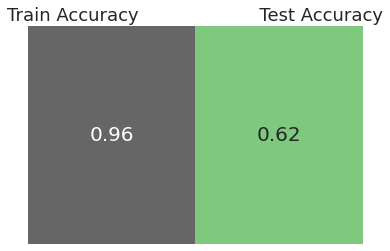

In [207]:
sns.heatmap(np.matrix([[log_train_acc,log_test_acc]]),annot=True,cmap='Accent',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

AUC: 0.664


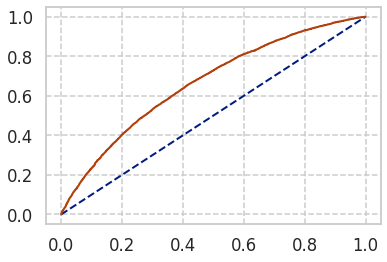

In [208]:
# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_log_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_log_train)
# calculate roc curve
train_fpr_log_train, train_tpr_log_train, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_log_train, train_tpr_log_train); 

AUC: 0.661


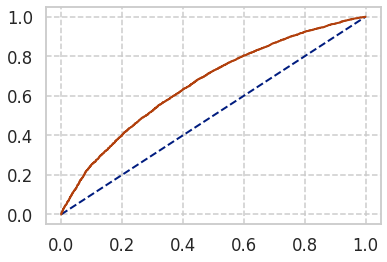

In [209]:
# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_log_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc_log_test)
# calculate roc curve
test_fpr_log_test, test_tpr_log_test, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_log_test, test_tpr_log_test);

In [210]:
confusion_matrix(y_train, ytrain_predict_log)

array([[11511,   481],
       [  532, 11152]])

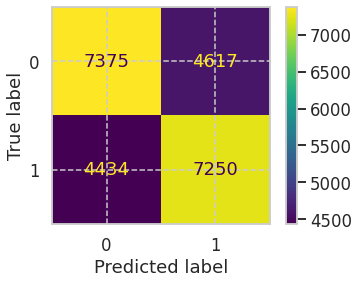

In [211]:
plot_confusion_matrix(lr,x_train,y_train);

In [212]:
confusion_matrix(y_test, ytest_predict_log)


array([[4193, 2358],
       [2504, 3861]])

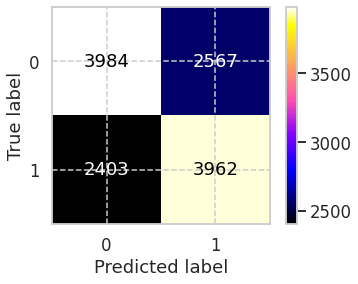

In [213]:
plot_confusion_matrix(lr,x_test,y_test,cmap="gnuplot2");


# K-Nearest Neighbour

In [214]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 

KNeighborsClassifier()

In [215]:
# performance of this model on the validation set

pred = neigh.predict(x_valid)

knn_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",knn_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.5487767110560545
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      3242
           1       0.54      0.57      0.56      3216

    accuracy                           0.55      6458
   macro avg       0.55      0.55      0.55      6458
weighted avg       0.55      0.55      0.55      6458



In [216]:
#performance of this model on the test set

pred = neigh.predict(x_test)
knnPredictproba = neigh.predict_proba(x_test)[:,1] #for ROC curve

knn_accuracy = accuracy_score(y_test, pred)
print("Accuracy",knn_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.5525704552493031
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      6551
           1       0.54      0.57      0.56      6365

    accuracy                           0.55     12916
   macro avg       0.55      0.55      0.55     12916
weighted avg       0.55      0.55      0.55     12916



In [217]:
# Use a cross validation to perform model validation and evaluation

# used x_train_plus_valid and y_train_plus_valid data 
#because it is the main training data.

knn_scores = cross_val_score(neigh,x_train_plus_valid,y_train_plus_valid,cv=10)
cross_val_mean_scores_comparisons["KNN"] = knn_scores.mean()

knn_scores.mean()

0.5534606728507369

# Naive Bayes

In [218]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train)  

GaussianNB()

In [219]:
# performance of this model on the validation set
pred = gnb.predict(x_valid)

gnb_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",gnb_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.5470733973366367
              precision    recall  f1-score   support

           0       0.53      0.85      0.65      3242
           1       0.61      0.24      0.35      3216

    accuracy                           0.55      6458
   macro avg       0.57      0.55      0.50      6458
weighted avg       0.57      0.55      0.50      6458



In [220]:
#performance of this model on the test set
pred = gnb.predict(x_test)
gnbPredictproba = gnb.predict_proba(x_test)[:,1]

gnb_accuracy = accuracy_score(y_test, pred)
print("Accuracy",gnb_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.5590740167234438
              precision    recall  f1-score   support

           0       0.54      0.85      0.66      6551
           1       0.63      0.26      0.37      6365

    accuracy                           0.56     12916
   macro avg       0.58      0.55      0.52     12916
weighted avg       0.58      0.56      0.52     12916



In [221]:
gnb_scores = cross_val_score(gnb, x_train_plus_valid,y_train_plus_valid,cv=10)

cross_val_mean_scores_comparisons["Gaussian Naive Bayes"] = gnb_scores.mean()

print("Cross Val Mean Score", gnb_scores.mean())

Cross Val Mean Score 0.5616919471496111


# Ada boost

In [222]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(n_estimators=50)
adab.fit(x_train,y_train) 

AdaBoostClassifier()

In [223]:
# performance of this model on the validation set
pred = adab.predict(x_valid)

adab_accuracy = accuracy_score(y_valid, pred)
print("Accuracy",adab_accuracy)
print(classification_report(y_valid,pred))

Accuracy 0.6164447197274698
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3242
           1       0.61      0.63      0.62      3216

    accuracy                           0.62      6458
   macro avg       0.62      0.62      0.62      6458
weighted avg       0.62      0.62      0.62      6458



In [224]:
# Assess the performance of this model on the test set
pred = adab.predict(x_test)
adabPredictproba = adab.predict_proba(x_test)[:,1]

adab_accuracy = accuracy_score(y_test, pred)
print("Accuracy",adab_accuracy)
print(classification_report(y_test,pred))

Accuracy 0.6232579746051409
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6551
           1       0.62      0.62      0.62      6365

    accuracy                           0.62     12916
   macro avg       0.62      0.62      0.62     12916
weighted avg       0.62      0.62      0.62     12916



In [225]:
adab_scores = cross_val_score(adab, x_train_plus_valid,y_train_plus_valid,cv=10)

cross_val_mean_scores_comparisons["ADA Boost"] = adab_scores.mean()

print("Cross Val Mean Score", adab_scores.mean())

Cross Val Mean Score 0.6240460988448419


# Visualizations of Results and Evaluations using ROC Curve

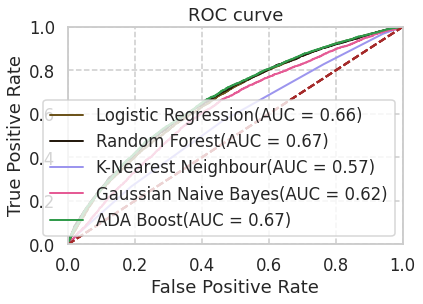

<Figure size 432x432 with 0 Axes>

In [226]:
pltAUC(y_test,lrPredictproba, 'Logistic Regression')
pltAUC(y_test,rfPredictproba, 'Random Forest')
pltAUC(y_test,knnPredictproba, 'K-Nearest Neighbour')
pltAUC(y_test,gnbPredictproba, 'Gaussian Naive Bayes')
pltAUC(y_test,adabPredictproba, 'ADA Boost')



plt.show()
plt.figure(figsize=(6,6))
plt.show()

In [227]:

#Observations from ROC
#- The Logistic and Random Forest model gives the best  same results  as compared to the other models  with Gaussian Naive Bayes pretty close to them.
#- K-NN model gives the poor results.

# Compare Model Cross Val Scores Result

In [228]:
#Plotting the mean cross-validation scores of all the models.
display(cross_val_mean_scores_comparisons)

{'Logistic ': 0.6142893843554728,
 'Random Forest ': 0.6166459938805323,
 'KNN': 0.5534606728507369,
 'Gaussian Naive Bayes': 0.5616919471496111,
 'ADA Boost': 0.6240460988448419}

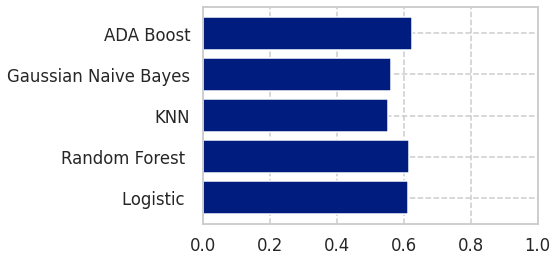

In [229]:
plt.xlim(0, 1.0)
_ = plt.barh(range(len(cross_val_mean_scores_comparisons)), list(cross_val_mean_scores_comparisons.values()), align='center')
_ = plt.yticks(range(len(cross_val_mean_scores_comparisons)), list(cross_val_mean_scores_comparisons.keys()))

# OverSampling(or Up Sampling)

In [230]:
# finding the categorical columns

categ= bank_application.select_dtypes(include=np.object)
categ

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary,Single,House / apartment,Laborers,WEDNESDAY,N,N,N,N,N,N,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,N,N,N,N,N,N,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary,Single,House / apartment,Laborers,MONDAY,N,N,N,N,N,N,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary,Civil marriage,House / apartment,Laborers,WEDNESDAY,N,N,N,N,N,N,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary,Single,House / apartment,Core staff,THURSDAY,N,N,N,N,Y,Y,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,Cash loans,F,N,Y,Unaccompanied,Working,Secondary,Separated,House / apartment,Sales staff,WEDNESDAY,N,N,N,N,N,N,Self-employed
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary,Separated,With parents,Sales staff,THURSDAY,N,N,N,N,N,N,Services
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,N,N,N,N,Y,Y,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary,Married,House / apartment,Laborers,WEDNESDAY,N,N,N,Y,Y,N,Business Entity Type 1


In [231]:
#encoding categorical
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

one_hot_encoded_data = pd.get_dummies(categ)


one_hot_encoded_data


,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
307506,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307508,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
# finding the numerical columns

num= bank_application.select_dtypes(include=np.number)
num

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TO_sub_doc
0,100002,1,0,2.025,4.065975,24700.5,351000.0,0.018801,25.920548,1.745205,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,0,2.700,12.935025,35698.5,1129500.0,0.003541,45.931507,3.254795,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,0,0.675,1.350000,6750.0,135000.0,0.010032,52.180822,0.616438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,0,1.350,3.126825,29686.5,297000.0,0.008019,52.068493,8.326027,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,100007,0,0,1.215,5.130000,21865.5,513000.0,0.028663,54.608219,8.323288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,0,1.530,3.319200,16096.5,225000.0,0.022625,45.767123,19.884932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
307506,456251,0,0,1.575,2.547000,27558.0,225000.0,0.032561,25.553425,0.646575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
307508,456253,0,0,1.530,6.776640,29979.0,585000.0,0.005002,41.002740,21.701370,...,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
307509,456254,1,0,1.710,3.701070,20205.0,319500.0,0.005313,32.769863,13.112329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [233]:
#Now combine the both dataframes in to one single final dataframe 
#which will be used for doing the further steps i.e Train-Test splits for model fitting and predicitions and evaluations
final= pd.concat([num,one_hot_encoded_data],axis=1)
final= final.reset_index(drop=True)
final


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,0,2.025,4.065975,24700.5,351000.0,0.018801,25.920548,1.745205,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,2.700,12.935025,35698.5,1129500.0,0.003541,45.931507,3.254795,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,0.675,1.350000,6750.0,135000.0,0.010032,52.180822,0.616438,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1.350,3.126825,29686.5,297000.0,0.008019,52.068493,8.326027,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1.215,5.130000,21865.5,513000.0,0.028663,54.608219,8.323288,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239110,456248,0,0,1.530,3.319200,16096.5,225000.0,0.022625,45.767123,19.884932,...,0,0,0,0,0,0,0,0,0,0
239111,456251,0,0,1.575,2.547000,27558.0,225000.0,0.032561,25.553425,0.646575,...,0,0,0,0,0,0,0,0,0,0
239112,456253,0,0,1.530,6.776640,29979.0,585000.0,0.005002,41.002740,21.701370,...,0,0,0,0,0,0,0,0,0,0
239113,456254,1,0,1.710,3.701070,20205.0,319500.0,0.005313,32.769863,13.112329,...,0,0,0,0,0,0,0,0,0,0


In [234]:
#It is understood that I can remove the SK_ID_CURR feature because it is the Loan ID in the loan application, and it does not tell anything, that results in target.
final = final.drop('SK_ID_CURR',axis=1)


In [235]:
#Taking the target variable seperately for splitting
Y_up = final[['TARGET']]
print(Y_up.shape)
Y_up.head()




(239115, 1)


,TARGET
0,1
1,0
2,0
3,0
4,0


In [236]:
X_up = final.drop('TARGET', axis=1) 
print(X_up.shape)
X_up.head()


(239115, 157)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,2.025,4.065975,24700.5,351000.0,0.018801,25.920548,1.745205,3648.0,2120,...,0,0,0,0,0,0,0,0,0,0
1,0,2.700,12.935025,35698.5,1129500.0,0.003541,45.931507,3.254795,1186.0,291,...,0,0,0,0,0,0,0,0,0,0
2,0,0.675,1.350000,6750.0,135000.0,0.010032,52.180822,0.616438,4260.0,2531,...,0,0,0,0,0,0,0,0,0,0
3,0,1.350,3.126825,29686.5,297000.0,0.008019,52.068493,8.326027,9833.0,2437,...,0,0,0,0,0,0,0,0,0,0
4,0,1.215,5.130000,21865.5,513000.0,0.028663,54.608219,8.323288,4311.0,3458,...,0,0,0,0,0,0,0,0,0,0


In [237]:
#Input_data=X_up.columns
#Input_data

In [238]:
#data splitting
from sklearn.model_selection import train_test_split


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_up,Y_up, test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train_1.shape)
print("Number transactions y_train dataset: ", y_train_1.shape)
print("Number transactions X_test dataset: ", X_test_1.shape)
print("Number transactions y_test dataset: ", y_test_1.shape)

Number transactions X_train dataset:  (191292, 157)
Number transactions y_train dataset:  (191292, 1)
Number transactions X_test dataset:  (47823, 157)
Number transactions y_test dataset:  (47823, 1)


In [239]:
#oversampling test and train data seperately using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE 
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train_1, y_train_1)
X_test_res, y_test_res = oversample.fit_resample(X_test_1, y_test_1)

##print("Before sample Train %s" format(y_train_1.shape))
#print("After sample Train %s"% Counter(y_train_res))

#print("Before sample Test %s"% Counter(y_test_1))
#print("After sample Test %s"%Counter(y_test_res))


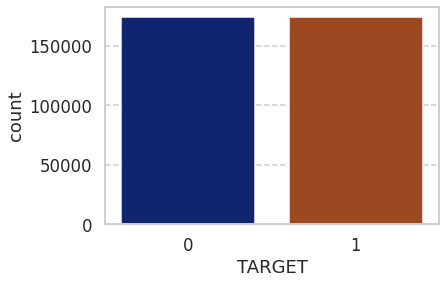

In [240]:
#For train
sns.countplot(x='TARGET',data=y_train_res)

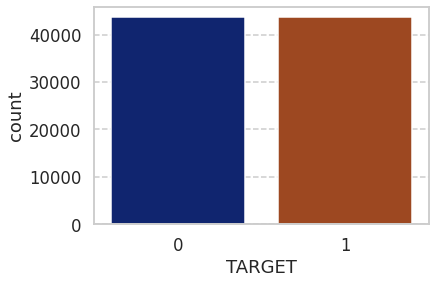

In [241]:
#For test
sns.countplot(x='TARGET',data=y_test_res)

In [242]:
#checking the min and max of x-train for normalisation and storing into pickel for normalisation
minn=X_train_res.min()
minn


CNT_CHILDREN                               0.0000
AMT_INCOME_TOTAL                           0.2565
AMT_CREDIT                                 0.4500
AMT_ANNUITY                             1980.0000
AMT_GOODS_PRICE                        40500.0000
                                          ...    
ORGANIZATION_TYPE_Transport: type 1        0.0000
ORGANIZATION_TYPE_Transport: type 2        0.0000
ORGANIZATION_TYPE_Transport: type 3        0.0000
ORGANIZATION_TYPE_Transport: type 4        0.0000
ORGANIZATION_TYPE_University               0.0000
Length: 157, dtype: float64

In [243]:
import pickle
file='.\Modell\X_min.pkl'
with open(file, 'wb') as f:
  pickle.dump(minn, f)

In [244]:
with open(file, 'rb') as f:
  minn = pickle.load(f)

In [245]:
maxx=X_train_res.max()
maxx
       

CNT_CHILDREN                           3.000000e+00
AMT_INCOME_TOTAL                       1.170000e+03
AMT_CREDIT                             1.718473e+01
AMT_ANNUITY                            1.191960e+05
AMT_GOODS_PRICE                        1.345500e+06
                                           ...     
ORGANIZATION_TYPE_Transport: type 1    1.000000e+00
ORGANIZATION_TYPE_Transport: type 2    1.000000e+00
ORGANIZATION_TYPE_Transport: type 3    1.000000e+00
ORGANIZATION_TYPE_Transport: type 4    1.000000e+00
ORGANIZATION_TYPE_University           1.000000e+00
Length: 157, dtype: float64

In [246]:
import pickle
file='.\Modell\X_max.pkl'
with open(file, 'wb') as f:
    pickle.dump(maxx, f)

In [247]:
with open(file, 'rb') as f:
   maxxx = pickle.load(f)

In [248]:
#normalizing
normalized_df=(X_train_res-X_train_res.min())/(X_train_res.max()-X_train_res.min())
normalized_df

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0.333333,0.000742,0.033306,0.076743,0.041379,0.134897,0.126193,0.027347,0.196775,0.292900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000742,0.191157,0.228655,0.210345,0.158035,0.089024,0.084373,0.068147,0.239266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.001704,0.645364,0.364865,0.831034,0.392880,0.336101,0.239273,0.174486,0.678477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000935,0.174786,0.127073,0.227586,0.392880,0.220132,0.021110,0.214176,0.479644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.001127,0.064429,0.117783,0.072414,0.158035,0.750099,0.239685,0.534602,0.577463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348345,0.000000,0.000343,0.070051,0.054625,0.072414,0.021582,0.046418,0.103371,0.134087,0.118938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348346,0.000000,0.001684,0.645364,0.364865,0.831034,0.264011,0.349580,0.036402,0.113402,0.503960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348347,0.000000,0.001475,0.112008,0.126027,0.103448,0.244069,0.463813,0.135318,0.402358,0.624844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348348,0.333333,0.001063,0.289402,0.291203,0.313793,0.299107,0.348549,0.083359,0.115338,0.386550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
# check which columns have only one value which has no effect to our data

nunique = X_train_res.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index([], dtype='object')

In [250]:
# Normalizing the encoded data. 
normalized_test=(X_test_res-X_test_res.min())/(X_test_res.max()-X_test_res.min())
normalized_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0.333333,0.006009,0.376462,0.172135,0.484429,0.489878,0.615072,0.015284,0.064003,0.317942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.004006,0.161341,0.118762,0.207612,0.126766,0.343816,0.134544,0.368488,0.657613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.014772,0.699145,0.330342,0.899654,1.000000,0.365830,0.045442,0.044190,0.744847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.006849,0.242012,0.180407,0.311419,0.280375,0.502716,0.381220,0.250224,0.001917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.006009,0.222306,0.200694,0.242215,0.131976,0.044943,0.049554,0.093840,0.181339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87343,0.000000,0.003685,0.277053,0.195488,0.314978,0.278080,0.183743,0.212290,0.064923,0.555999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87344,0.333333,0.005657,0.242012,0.167670,0.311419,0.105253,0.214235,0.109872,0.311651,0.076050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87345,0.000000,0.008461,0.617398,0.256642,0.657439,0.264694,0.233792,0.030602,0.263062,0.608084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87346,0.000000,0.007872,0.404319,0.284338,0.484429,0.307039,0.386599,0.216862,0.122854,0.731267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
# check which columns have only one value which has no effect to our data

nunique = X_test_res.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['NAME_INCOME_TYPE_Businessman'], dtype='object')

In [252]:
print("X_train", X_train_res.shape)
print("y_train", y_train_res.shape)
print("X_test", X_test_res.shape)
print("y_test", y_test_res.shape)

X_train (348350, 157)
y_train (348350, 1)
X_test (87348, 157)
y_test (87348, 1)


# Logistic Regression

In [253]:
# importing the model and fitting with training data

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [254]:
# Assess the performance of this model on the validation set

#pred=lr.predict(x_valid)

#logistic_accuracy = accuracy_score(y_valid, pred)
#print("Accuracy", logistic_accuracy)
#print(classification_report(y_valid,pred))

In [255]:
# Assess the performance of this model on the test set

pred=lr.predict(X_test_res)
lrPredictproba = lr.predict_proba(X_test_res)[:,1] #for ROC curve

logistic_accuracy = accuracy_score(y_test_res, pred)
print("Accuracy", logistic_accuracy)
print(classification_report(y_test_res,pred))

Accuracy 0.553178092228786
              precision    recall  f1-score   support

           0       0.54      0.68      0.60     43674
           1       0.57      0.43      0.49     43674

    accuracy                           0.55     87348
   macro avg       0.56      0.55      0.55     87348
weighted avg       0.56      0.55      0.55     87348



# Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [257]:
# Assess the performance of this model on the test set

R_pred = rfc.predict(X_test_res)
rfPredictproba = rfc.predict_proba(X_test_res)[:,1] #for ROC curve

randomforest_accuracy = accuracy_score(y_test_res, R_pred)
print("Accuracy",randomforest_accuracy)
print(classification_report(y_test_res,R_pred))

Accuracy 0.9490543572835096
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     43674
           1       1.00      0.90      0.95     43674

    accuracy                           0.95     87348
   macro avg       0.95      0.95      0.95     87348
weighted avg       0.95      0.95      0.95     87348



In [258]:
print(R_pred    )

[0 0 0 ... 1 1 1]


# Naive Bayes

In [259]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_res,y_train_res)  

GaussianNB()

In [260]:
# performance of this model on the test set
pred = gnb.predict(X_test_res)
gnbPredictproba = gnb.predict_proba(X_test_res)[:,1]

gnb_accuracy = accuracy_score(y_test_res, pred)
print("Accuracy",gnb_accuracy)
print(classification_report(y_test_res,pred))

Accuracy 0.5946902046984476
              precision    recall  f1-score   support

           0       0.62      0.48      0.54     43674
           1       0.58      0.71      0.64     43674

    accuracy                           0.59     87348
   macro avg       0.60      0.59      0.59     87348
weighted avg       0.60      0.59      0.59     87348



# Ada boost

In [261]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(n_estimators=50)
adab.fit(X_train_res,y_train_res)  

AdaBoostClassifier()

In [262]:
# Assess the performance of this model on the test set
pred = adab.predict(X_test_res)
adabPredictproba = adab.predict_proba(X_test_res)[:,1]

adab_accuracy = accuracy_score(y_test_res, pred)
print("Accuracy",adab_accuracy)
print(classification_report(y_test_res,pred))

Accuracy 0.9413724412694051
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     43674
           1       0.99      0.89      0.94     43674

    accuracy                           0.94     87348
   macro avg       0.95      0.94      0.94     87348
weighted avg       0.95      0.94      0.94     87348



# Visualizations of Results and Evaluations using ROC Curve

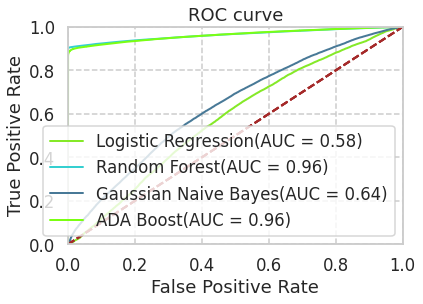

<Figure size 432x432 with 0 Axes>

In [263]:
pltAUC(y_test_res,lrPredictproba, 'Logistic Regression')
pltAUC(y_test_res,rfPredictproba, 'Random Forest')
pltAUC(y_test_res,gnbPredictproba, 'Gaussian Naive Bayes')
pltAUC(y_test_res,adabPredictproba, 'ADA Boost')




plt.show()
plt.figure(figsize=(6,6))
plt.show()

In [264]:
Prediction = rfc.predict(X_test_res)

In [265]:
print(Prediction)


[0 0 0 ... 1 1 1]


In [266]:
#observation:Random Forest model gives the best result compared to all other models.
import pickle
file='.\Modell\ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(rfc, f)


In [267]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [268]:
cy = k.predict(X_test_res)
print(cy)

[0 0 0 ... 1 1 1]


In [269]:
#Observation : The AdaBoost Classifier and Random Forest model trained in oversampled train data set gives the best same 
#results as compared to the other models.